# SORTEAZY

End-to-end source detection and photometry

Goes from default MAST i2d.fits files --> matched catalogs, photoz, and photometric plots/redshifts

We demonstrate the code on the CEERS EGS Field (proposal id 1345) (o001_t021)

As of now, this code is meant for only JWST NIRCam data.

In [1]:
import os
from PrepImg import PrepImg
from SExtractor import SExtractor
from MakeCats import MakeCats
from eazyMethods import Eazy
from Trilogy import Trilogy

/Users/jakesummers7200/miniconda3/envs/mirage/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "




The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol


# Prepare Images (MAST I2D --> Reprojected sci, wht)

In [2]:
image_dir = '/Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images'

file = 'jw01345-o001_t021_nircam_clear-*_i2d.fits' #This

#file1 = 'CEERS_EGS1_*_sci.fits' #Or these
#file2 = 'CEERS_EGS1_*_wht.fits'
#file = (file1, file2)

# file name pattern can be a single string or a list/tuple of strings
# it can be i2d files (which are then split into sci, wht) or can be sci/drz, wht
p = PrepImg(image_dir, file, 'CEERS_EGS1', reproject=True, i2d=True)
p.bkgsub(size=100) #not really used for anything, but a nice functionality

Reprojecting pixel grids...: 100%|██████████████| 14/14 [07:59<00:00, 34.22s/it]


Field: CEERS_EGS1
Image Directory: /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images
Image File Pattern: CEERS_EGS1_*_sci.fits
SW ZP: 28.024
LW ZP: 26.475


Background Subtraction...: 100%|██████████████████| 7/7 [01:06<00:00,  9.47s/it]

Field: CEERS_EGS1
Image Directory: /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images
Image File Pattern: CEERS_EGS1_*_sci_bkgsub.fits


In [3]:
cat_dir = '/Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/cats'
config_file = '/Users/jakesummers7200/sextractor/config.sex' #SExtractor config file
p.tweakwcs(cat_dir, config_file, ref_filt='F200W', overwrite=True)

SExtractor initialized
Field: CEERS_EGS1
Zeropoint: SW-28.024279492015275 LW-26.47514939897451
Catalog Directory: /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/cats
Image Directory: /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images
Image File Pattern: CEERS_EGS1_*_sci.fits
7 Images Found!


Calculating Pixel Sizes...: 100%|███████████████| 7/7 [00:00<00:00, 1029.60it/s]


Pixel sizes: SW-0.031" LW-0.031"


Calculating Areas...: 100%|███████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Areas calculated!


Calculating Exposure Times...: 100%|█████████████| 7/7 [00:00<00:00, 983.82it/s]
> 
----- SExtractor 2.25.0 started on 2022-12-10 at 15:28:02 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing catalog
> Looking for CEERS_EGS1_f115w_sci.fits
----- Measuring from: CEERS_EGS1_f115w_sci.fits
      "Unnamed" / no ext. header / 10075x4465 / 32 bits (floats)
> Looking for CEERS_EGS1_f115w_wht.fits
----- Weighting from: CEERS_EGS1_f115w_wht.fits
      "Unnamed" / no ext. header / 10075x4465 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:  134
> Setting up background map at line:  268
> Setting up background map at line:  402
> Setting up background map at line:  536


Exposure times found.
Ready to run Source Extractor!
Running SourceExtractor...


> Setting up background map at line:  670
> Setting up background map at line:  804
> Setting up background map at line:  938
> Setting up background map at line: 1072
> Setting up background map at line: 1206
> Setting up background map at line: 1340
> Setting up background map at line: 1474
> Setting up background map at line: 1608
> Setting up background map at line: 1742
> Setting up background map at line: 1876
> Setting up background map at line: 2010
> Setting up background map at line: 2144
> Setting up background map at line: 2278
> Setting up background map at line: 2412
> Setting up background map at line: 2546
> Setting up background map at line: 2680
> Setting up background map at line: 2814
> Setting up background map at line: 2948
> Setting up background map at line: 3082
> Setting up background map at line: 3216
> Setting up background map at line: 3350
> Setting up background map at line: 3484
> Setting up background map at line: 3618
> Setting up background map at lin

> Line: 2450  Objects:     5755 detected /        0 sextracted
> Line: 2475  Objects:     5785 detected /        0 sextracted
> Line: 2500  Objects:     5822 detected /        0 sextracted
> Line: 2525  Objects:     5843 detected /        0 sextracted
> Line: 2550  Objects:     5881 detected /        0 sextracted
> Line: 2575  Objects:     5916 detected /        0 sextracted
> Line: 2600  Objects:     5953 detected /        0 sextracted
> Line: 2625  Objects:     5989 detected /        0 sextracted
> Line: 2650  Objects:     6041 detected /        0 sextracted
> Line: 2675  Objects:     6095 detected /        0 sextracted
> Line: 2700  Objects:     6132 detected /        0 sextracted
> Line: 2725  Objects:     6171 detected /        0 sextracted
> Line: 2750  Objects:     6228 detected /        0 sextracted
> Line: 2775  Objects:     6265 detected /        0 sextracted
> Line: 2800  Objects:     6303 detected /        0 sextracted
> Line: 2825  Objects:     6336 detected /        0 sex

> Setting up background map at line: 2010
> Setting up background map at line: 2144
> Setting up background map at line: 2278
> Setting up background map at line: 2412
> Setting up background map at line: 2546
> Setting up background map at line: 2680
> Setting up background map at line: 2814
> Setting up background map at line: 2948
> Setting up background map at line: 3082
> Setting up background map at line: 3216
> Setting up background map at line: 3350
> Setting up background map at line: 3484
> Setting up background map at line: 3618
> Setting up background map at line: 3752
> Setting up background map at line: 3886
> Setting up background map at line: 4020
> Setting up background map at line: 4154
> Setting up background map at line: 4288
> Setting up background map at line: 4422
> Filtering background map(s)
> Computing background d-map
> Computing background-noise d-map
(M+D) Background: 0.19042    RMS: 0.00697182 / Threshold: 0.0104577  
> Scanning image
> Line:   25  Objects

> Line: 2500  Objects:     7758 detected /        0 sextracted
> Line: 2525  Objects:     7819 detected /        0 sextracted
> Line: 2550  Objects:     7886 detected /        0 sextracted
> Line: 2575  Objects:     7942 detected /        0 sextracted
> Line: 2600  Objects:     7989 detected /        0 sextracted
> Line: 2625  Objects:     8027 detected /        0 sextracted
> Line: 2650  Objects:     8082 detected /        0 sextracted
> Line: 2675  Objects:     8169 detected /        0 sextracted
> Line: 2700  Objects:     8235 detected /        0 sextracted
> Line: 2725  Objects:     8291 detected /        0 sextracted
> Line: 2750  Objects:     8356 detected /        0 sextracted
> Line: 2775  Objects:     8431 detected /        0 sextracted
> Line: 2800  Objects:     8474 detected /        0 sextracted
> Line: 2825  Objects:     8518 detected /        0 sextracted
> Line: 2850  Objects:     8577 detected /        0 sextracted
> Line: 2875  Objects:     8620 detected /        0 sex

> Setting up background map at line: 1072
> Setting up background map at line: 1206
> Setting up background map at line: 1340
> Setting up background map at line: 1474
> Setting up background map at line: 1608
> Setting up background map at line: 1742
> Setting up background map at line: 1876
> Setting up background map at line: 2010
> Setting up background map at line: 2144
> Setting up background map at line: 2278
> Setting up background map at line: 2412
> Setting up background map at line: 2546
> Setting up background map at line: 2680
> Setting up background map at line: 2814
> Setting up background map at line: 2948
> Setting up background map at line: 3082
> Setting up background map at line: 3216
> Setting up background map at line: 3350
> Setting up background map at line: 3484
> Setting up background map at line: 3618
> Setting up background map at line: 3752
> Setting up background map at line: 3886
> Setting up background map at line: 4020
> Setting up background map at lin

> Line: 2525  Objects:     9191 detected /        0 sextracted
> Line: 2550  Objects:     9259 detected /        0 sextracted
> Line: 2575  Objects:     9342 detected /        0 sextracted
> Line: 2600  Objects:     9400 detected /        0 sextracted
> Line: 2625  Objects:     9450 detected /        0 sextracted
> Line: 2650  Objects:     9524 detected /        0 sextracted
> Line: 2675  Objects:     9578 detected /        0 sextracted
> Line: 2700  Objects:     9635 detected /        0 sextracted
> Line: 2725  Objects:     9707 detected /        0 sextracted
> Line: 2750  Objects:     9777 detected /        0 sextracted
> Line: 2775  Objects:     9841 detected /        0 sextracted
> Line: 2800  Objects:     9895 detected /        0 sextracted
> Line: 2825  Objects:     9945 detected /        0 sextracted
> Line: 2850  Objects:    10023 detected /        0 sextracted
> Line: 2875  Objects:    10077 detected /        0 sextracted
> Line: 2900  Objects:    10154 detected /        0 sex

> Setting up background map at line:  938
> Setting up background map at line: 1072
> Setting up background map at line: 1206
> Setting up background map at line: 1340
> Setting up background map at line: 1474
> Setting up background map at line: 1608
> Setting up background map at line: 1742
> Setting up background map at line: 1876
> Setting up background map at line: 2010
> Setting up background map at line: 2144
> Setting up background map at line: 2278
> Setting up background map at line: 2412
> Setting up background map at line: 2546
> Setting up background map at line: 2680
> Setting up background map at line: 2814
> Setting up background map at line: 2948
> Setting up background map at line: 3082
> Setting up background map at line: 3216
> Setting up background map at line: 3350
> Setting up background map at line: 3484
> Setting up background map at line: 3618
> Setting up background map at line: 3752
> Setting up background map at line: 3886
> Setting up background map at lin

> Line: 2450  Objects:    12966 detected /        0 sextracted
> Line: 2475  Objects:    13100 detected /        0 sextracted
> Line: 2500  Objects:    13227 detected /        0 sextracted
> Line: 2525  Objects:    13364 detected /        0 sextracted
> Line: 2550  Objects:    13516 detected /        0 sextracted
> Line: 2575  Objects:    13675 detected /        0 sextracted
> Line: 2600  Objects:    13820 detected /        0 sextracted
> Line: 2625  Objects:    13941 detected /        0 sextracted
> Line: 2650  Objects:    14099 detected /        0 sextracted
> Line: 2675  Objects:    14264 detected /        0 sextracted
> Line: 2700  Objects:    14404 detected /        0 sextracted
> Line: 2725  Objects:    14517 detected /        0 sextracted
> Line: 2750  Objects:    14674 detected /        0 sextracted
> Line: 2775  Objects:    14813 detected /        0 sextracted
> Line: 2800  Objects:    14959 detected /        0 sextracted
> Line: 2825  Objects:    15067 detected /        0 sex

> Line: 4465  Objects:    23187 detected /    14000 sextracted
      Objects: detected 23187    / sextracted 14026           

> Closing files
> 
> All done (in 14.4 s: 309.3 lines/s , 971.7 detections/s)
> 
----- SExtractor 2.25.0 started on 2022-12-10 at 15:28:46 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing catalog
> Looking for CEERS_EGS1_f356w_sci.fits
----- Measuring from: CEERS_EGS1_f356w_sci.fits
      "Unnamed" / no ext. header / 10075x4465 / 32 bits (floats)
> Looking for CEERS_EGS1_f356w_wht.fits
----- Weighting from: CEERS_EGS1_f356w_wht.fits
      "Unnamed" / no ext. header / 10075x4465 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:  134
> Setting up background map at line:  268
> Setting up background map at line:  402
> Setting up background map at line:  536
> Setting up background map at line:  670
> Setting up background map at line:  804
> Setting up background 

> Line: 2075  Objects:    11249 detected /        0 sextracted
> Line: 2100  Objects:    11374 detected /        0 sextracted
> Line: 2125  Objects:    11482 detected /        0 sextracted
> Line: 2150  Objects:    11612 detected /        0 sextracted
> Line: 2175  Objects:    11744 detected /        0 sextracted
> Line: 2200  Objects:    11932 detected /        0 sextracted
> Line: 2225  Objects:    12108 detected /        0 sextracted
> Line: 2250  Objects:    12302 detected /        0 sextracted
> Line: 2275  Objects:    12478 detected /        0 sextracted
> Line: 2300  Objects:    12658 detected /        0 sextracted
> Line: 2325  Objects:    12769 detected /        0 sextracted
> Line: 2350  Objects:    12895 detected /        0 sextracted
> Line: 2375  Objects:    13028 detected /        0 sextracted
> Line: 2400  Objects:    13123 detected /        0 sextracted
> Line: 2425  Objects:    13233 detected /        0 sextracted
> Line: 2450  Objects:    13372 detected /        0 sex

> Line: 4465  Objects:    23603 detected /     8400 sextracted
> Line: 4465  Objects:    23603 detected /     8800 sextracted
> Line: 4465  Objects:    23603 detected /     9200 sextracted
> Line: 4465  Objects:    23603 detected /     9600 sextracted
> Line: 4465  Objects:    23603 detected /    10000 sextracted
> Line: 4465  Objects:    23603 detected /    10400 sextracted
> Line: 4465  Objects:    23603 detected /    10800 sextracted
> Line: 4465  Objects:    23603 detected /    11200 sextracted
> Line: 4465  Objects:    23603 detected /    11600 sextracted
> Line: 4465  Objects:    23603 detected /    12000 sextracted
> Line: 4465  Objects:    23603 detected /    12400 sextracted
> Line: 4465  Objects:    23603 detected /    12800 sextracted
> Line: 4465  Objects:    23603 detected /    13200 sextracted
> Line: 4465  Objects:    23603 detected /    13600 sextracted
      Objects: detected 23603    / sextracted 13736           

> Closing files
> 
> All done (in 14.6 s: 306.7 lines/

> Line: 1650  Objects:     9767 detected /        0 sextracted
> Line: 1675  Objects:     9937 detected /        0 sextracted
> Line: 1700  Objects:    10085 detected /        0 sextracted
> Line: 1725  Objects:    10221 detected /        0 sextracted
> Line: 1750  Objects:    10373 detected /        0 sextracted
> Line: 1775  Objects:    10558 detected /        0 sextracted
> Line: 1800  Objects:    10663 detected /        0 sextracted
> Line: 1825  Objects:    10803 detected /        0 sextracted
> Line: 1850  Objects:    10928 detected /        0 sextracted
> Line: 1875  Objects:    11070 detected /        0 sextracted
> Line: 1900  Objects:    11208 detected /        0 sextracted
> Line: 1925  Objects:    11360 detected /        0 sextracted
> Line: 1950  Objects:    11508 detected /        0 sextracted
> Line: 1975  Objects:    11657 detected /        0 sextracted
> Line: 2000  Objects:    11837 detected /        0 sextracted
> Line: 2025  Objects:    11971 detected /        0 sex

> Line: 4465  Objects:    25632 detected /     1200 sextracted
> Line: 4465  Objects:    25632 detected /     1600 sextracted
> Line: 4465  Objects:    25632 detected /     2000 sextracted
> Line: 4465  Objects:    25632 detected /     2400 sextracted
> Line: 4465  Objects:    25632 detected /     2800 sextracted
> Line: 4465  Objects:    25632 detected /     3200 sextracted
> Line: 4465  Objects:    25632 detected /     3600 sextracted
> Line: 4465  Objects:    25632 detected /     4000 sextracted
> Line: 4465  Objects:    25632 detected /     4400 sextracted
> Line: 4465  Objects:    25632 detected /     4800 sextracted
> Line: 4465  Objects:    25632 detected /     5200 sextracted
> Line: 4465  Objects:    25632 detected /     5600 sextracted
> Line: 4465  Objects:    25632 detected /     6000 sextracted
> Line: 4465  Objects:    25632 detected /     6400 sextracted
> Line: 4465  Objects:    25632 detected /     6800 sextracted
> Line: 4465  Objects:    25632 detected /     7200 sex

> Line: 1200  Objects:     6943 detected /        0 sextracted
> Line: 1225  Objects:     7088 detected /        0 sextracted
> Line: 1250  Objects:     7287 detected /        0 sextracted
> Line: 1275  Objects:     7485 detected /        0 sextracted
> Line: 1300  Objects:     7678 detected /        0 sextracted
> Line: 1325  Objects:     7838 detected /        0 sextracted
> Line: 1350  Objects:     7997 detected /        0 sextracted
> Line: 1375  Objects:     8130 detected /        0 sextracted
> Line: 1400  Objects:     8259 detected /        0 sextracted
> Line: 1425  Objects:     8432 detected /        0 sextracted
> Line: 1450  Objects:     8601 detected /        0 sextracted
> Line: 1475  Objects:     8775 detected /        0 sextracted
> Line: 1500  Objects:     8924 detected /        0 sextracted
> Line: 1525  Objects:     9076 detected /        0 sextracted
> Line: 1550  Objects:     9252 detected /        0 sextracted
> Line: 1575  Objects:     9444 detected /        0 sex

> Line: 4125  Objects:    27093 detected /        0 sextracted
> Line: 4150  Objects:    27197 detected /        0 sextracted
> Line: 4175  Objects:    27303 detected /        0 sextracted
> Line: 4200  Objects:    27399 detected /        0 sextracted
> Line: 4225  Objects:    27525 detected /        0 sextracted
> Line: 4250  Objects:    27619 detected /        0 sextracted
> Line: 4275  Objects:    27732 detected /        0 sextracted
> Line: 4300  Objects:    27821 detected /        0 sextracted
> Line: 4325  Objects:    27865 detected /        0 sextracted
> Line: 4350  Objects:    27915 detected /        0 sextracted
> Line: 4375  Objects:    27970 detected /        0 sextracted
> Line: 4400  Objects:    27998 detected /        0 sextracted
> Line: 4425  Objects:    28001 detected /        0 sextracted
> Line: 4450  Objects:    28001 detected /        0 sextracted
> Line: 4465  Objects:    28001 detected /        0 sextracted
> Line: 4465  Objects:    28001 detected /      400 sex

Source Extractor done!


Tweaking images...: 100%|█████████████████████████| 7/7 [11:12<00:00, 96.08s/it]


# Run Source Extractor

In [5]:
# get these from previous output
image_dir = '/Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images'
imfile = 'CEERS_EGS1_*_sci.fits'
# catalog directory
cat_dir = '/Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/cats'
# from previous output
zeropoints = (28.024, 26.475)

sorteazy = SExtractor('CEERS_EGS1', image_dir, imfile, cat_dir, zeropoints)

config_file = '/Users/jakesummers7200/sextractor/config.sex' #SExtractor config file
sorteazy.sextract(config_file, overwrite=True) #set overwrite=True to make catalogs

SExtractor initialized
Field: CEERS_EGS1
Zeropoint: SW-28.024 LW-26.475
Catalog Directory: /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/cats
Image Directory: /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images
Image File Pattern: CEERS_EGS1_*_sci.fits
7 Images Found!


Calculating Pixel Sizes...: 100%|████████████████| 7/7 [00:00<00:00, 504.69it/s]


Pixel sizes: SW-0.031" LW-0.031"


Calculating Areas...: 100%|███████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Areas calculated!


Calculating Exposure Times...: 100%|█████████████| 7/7 [00:00<00:00, 978.74it/s]
> 
----- SExtractor 2.25.0 started on 2022-12-10 at 15:41:14 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing catalog
> Looking for CEERS_EGS1_f115w_sci.fits
----- Measuring from: CEERS_EGS1_f115w_sci.fits
      "Unnamed" / no ext. header / 10075x4465 / 32 bits (floats)
> Looking for CEERS_EGS1_f115w_wht.fits
----- Weighting from: CEERS_EGS1_f115w_wht.fits
      "Unnamed" / no ext. header / 10075x4465 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:  134
> Setting up background map at line:  268
> Setting up background map at line:  402
> Setting up background map at line:  536


Exposure times found.
Ready to run Source Extractor!


> Setting up background map at line:  670
> Setting up background map at line:  804
> Setting up background map at line:  938
> Setting up background map at line: 1072
> Setting up background map at line: 1206
> Setting up background map at line: 1340
> Setting up background map at line: 1474
> Setting up background map at line: 1608
> Setting up background map at line: 1742
> Setting up background map at line: 1876
> Setting up background map at line: 2010
> Setting up background map at line: 2144
> Setting up background map at line: 2278
> Setting up background map at line: 2412
> Setting up background map at line: 2546
> Setting up background map at line: 2680
> Setting up background map at line: 2814
> Setting up background map at line: 2948
> Setting up background map at line: 3082
> Setting up background map at line: 3216
> Setting up background map at line: 3350
> Setting up background map at line: 3484
> Setting up background map at line: 3618
> Setting up background map at lin

> Line: 2450  Objects:     7738 detected /        0 sextracted
> Line: 2475  Objects:     7780 detected /        0 sextracted
> Line: 2500  Objects:     7833 detected /        0 sextracted
> Line: 2525  Objects:     7862 detected /        0 sextracted
> Line: 2550  Objects:     7911 detected /        0 sextracted
> Line: 2575  Objects:     7966 detected /        0 sextracted
> Line: 2600  Objects:     8012 detected /        0 sextracted
> Line: 2625  Objects:     8065 detected /        0 sextracted
> Line: 2650  Objects:     8144 detected /        0 sextracted
> Line: 2675  Objects:     8228 detected /        0 sextracted
> Line: 2700  Objects:     8287 detected /        0 sextracted
> Line: 2725  Objects:     8346 detected /        0 sextracted
> Line: 2750  Objects:     8418 detected /        0 sextracted
> Line: 2775  Objects:     8465 detected /        0 sextracted
> Line: 2800  Objects:     8507 detected /        0 sextracted
> Line: 2825  Objects:     8546 detected /        0 sex

> Setting up background map at line: 1072
> Setting up background map at line: 1206
> Setting up background map at line: 1340
> Setting up background map at line: 1474
> Setting up background map at line: 1608
> Setting up background map at line: 1742
> Setting up background map at line: 1876
> Setting up background map at line: 2010
> Setting up background map at line: 2144
> Setting up background map at line: 2278
> Setting up background map at line: 2412
> Setting up background map at line: 2546
> Setting up background map at line: 2680
> Setting up background map at line: 2814
> Setting up background map at line: 2948
> Setting up background map at line: 3082
> Setting up background map at line: 3216
> Setting up background map at line: 3350
> Setting up background map at line: 3484
> Setting up background map at line: 3618
> Setting up background map at line: 3752
> Setting up background map at line: 3886
> Setting up background map at line: 4020
> Setting up background map at lin

> Line: 2400  Objects:     8091 detected /        0 sextracted
> Line: 2425  Objects:     8153 detected /        0 sextracted
> Line: 2450  Objects:     8216 detected /        0 sextracted
> Line: 2475  Objects:     8266 detected /        0 sextracted
> Line: 2500  Objects:     8348 detected /        0 sextracted
> Line: 2525  Objects:     8400 detected /        0 sextracted
> Line: 2550  Objects:     8483 detected /        0 sextracted
> Line: 2575  Objects:     8541 detected /        0 sextracted
> Line: 2600  Objects:     8591 detected /        0 sextracted
> Line: 2625  Objects:     8637 detected /        0 sextracted
> Line: 2650  Objects:     8695 detected /        0 sextracted
> Line: 2675  Objects:     8792 detected /        0 sextracted
> Line: 2700  Objects:     8863 detected /        0 sextracted
> Line: 2725  Objects:     8926 detected /        0 sextracted
> Line: 2750  Objects:     9001 detected /        0 sextracted
> Line: 2775  Objects:     9073 detected /        0 sex

> Setting up background map at line:  134
> Setting up background map at line:  268
> Setting up background map at line:  402
> Setting up background map at line:  536
> Setting up background map at line:  670
> Setting up background map at line:  804
> Setting up background map at line:  938
> Setting up background map at line: 1072
> Setting up background map at line: 1206
> Setting up background map at line: 1340
> Setting up background map at line: 1474
> Setting up background map at line: 1608
> Setting up background map at line: 1742
> Setting up background map at line: 1876
> Setting up background map at line: 2010
> Setting up background map at line: 2144
> Setting up background map at line: 2278
> Setting up background map at line: 2412
> Setting up background map at line: 2546
> Setting up background map at line: 2680
> Setting up background map at line: 2814
> Setting up background map at line: 2948
> Setting up background map at line: 3082
> Setting up background map at lin

> Line: 2325  Objects:     8658 detected /        0 sextracted
> Line: 2350  Objects:     8714 detected /        0 sextracted
> Line: 2375  Objects:     8794 detected /        0 sextracted
> Line: 2400  Objects:     8867 detected /        0 sextracted
> Line: 2425  Objects:     8930 detected /        0 sextracted
> Line: 2450  Objects:     8997 detected /        0 sextracted
> Line: 2475  Objects:     9057 detected /        0 sextracted
> Line: 2500  Objects:     9133 detected /        0 sextracted
> Line: 2525  Objects:     9191 detected /        0 sextracted
> Line: 2550  Objects:     9259 detected /        0 sextracted
> Line: 2575  Objects:     9342 detected /        0 sextracted
> Line: 2600  Objects:     9400 detected /        0 sextracted
> Line: 2625  Objects:     9450 detected /        0 sextracted
> Line: 2650  Objects:     9524 detected /        0 sextracted
> Line: 2675  Objects:     9578 detected /        0 sextracted
> Line: 2700  Objects:     9635 detected /        0 sex

> Setting up background map at line:  134
> Setting up background map at line:  268
> Setting up background map at line:  402
> Setting up background map at line:  536
> Setting up background map at line:  670
> Setting up background map at line:  804
> Setting up background map at line:  938
> Setting up background map at line: 1072
> Setting up background map at line: 1206
> Setting up background map at line: 1340
> Setting up background map at line: 1474
> Setting up background map at line: 1608
> Setting up background map at line: 1742
> Setting up background map at line: 1876
> Setting up background map at line: 2010
> Setting up background map at line: 2144
> Setting up background map at line: 2278
> Setting up background map at line: 2412
> Setting up background map at line: 2546
> Setting up background map at line: 2680
> Setting up background map at line: 2814
> Setting up background map at line: 2948
> Setting up background map at line: 3082
> Setting up background map at lin

> Line: 2300  Objects:    12710 detected /        0 sextracted
> Line: 2325  Objects:    12827 detected /        0 sextracted
> Line: 2350  Objects:    12975 detected /        0 sextracted
> Line: 2375  Objects:    13078 detected /        0 sextracted
> Line: 2400  Objects:    13167 detected /        0 sextracted
> Line: 2425  Objects:    13260 detected /        0 sextracted
> Line: 2450  Objects:    13400 detected /        0 sextracted
> Line: 2475  Objects:    13536 detected /        0 sextracted
> Line: 2500  Objects:    13673 detected /        0 sextracted
> Line: 2525  Objects:    13812 detected /        0 sextracted
> Line: 2550  Objects:    13971 detected /        0 sextracted
> Line: 2575  Objects:    14138 detected /        0 sextracted
> Line: 2600  Objects:    14285 detected /        0 sextracted
> Line: 2625  Objects:    14413 detected /        0 sextracted
> Line: 2650  Objects:    14583 detected /        0 sextracted
> Line: 2675  Objects:    14750 detected /        0 sex

> Line: 4465  Objects:    23944 detected /    11600 sextracted
> Line: 4465  Objects:    23944 detected /    12000 sextracted
> Line: 4465  Objects:    23944 detected /    12400 sextracted
> Line: 4465  Objects:    23944 detected /    12800 sextracted
> Line: 4465  Objects:    23944 detected /    13200 sextracted
> Line: 4465  Objects:    23944 detected /    13600 sextracted
> Line: 4465  Objects:    23944 detected /    14000 sextracted
> Line: 4465  Objects:    23944 detected /    14400 sextracted
      Objects: detected 23944    / sextracted 14500           

> Closing files
> 
> All done (in 14.6 s: 305.2 lines/s , 991.2 detections/s)
> 
----- SExtractor 2.25.0 started on 2022-12-10 at 15:41:59 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing catalog
> Looking for CEERS_EGS1_f356w_sci.fits
----- Measuring from: CEERS_EGS1_f356w_sci.fits
      "Unnamed" / no ext. header / 10075x4465 / 32 bits (floats)
> Looking for CEERS_EGS1_f356w_wht.fits
----- 

> Line: 1875  Objects:    10347 detected /        0 sextracted
> Line: 1900  Objects:    10460 detected /        0 sextracted
> Line: 1925  Objects:    10639 detected /        0 sextracted
> Line: 1950  Objects:    10813 detected /        0 sextracted
> Line: 1975  Objects:    10958 detected /        0 sextracted
> Line: 2000  Objects:    11151 detected /        0 sextracted
> Line: 2025  Objects:    11334 detected /        0 sextracted
> Line: 2050  Objects:    11474 detected /        0 sextracted
> Line: 2075  Objects:    11616 detected /        0 sextracted
> Line: 2100  Objects:    11740 detected /        0 sextracted
> Line: 2125  Objects:    11849 detected /        0 sextracted
> Line: 2150  Objects:    11990 detected /        0 sextracted
> Line: 2175  Objects:    12136 detected /        0 sextracted
> Line: 2200  Objects:    12322 detected /        0 sextracted
> Line: 2225  Objects:    12510 detected /        0 sextracted
> Line: 2250  Objects:    12714 detected /        0 sex

> Line: 4465  Objects:    24407 detected /     5200 sextracted
> Line: 4465  Objects:    24407 detected /     5600 sextracted
> Line: 4465  Objects:    24407 detected /     6000 sextracted
> Line: 4465  Objects:    24407 detected /     6400 sextracted
> Line: 4465  Objects:    24407 detected /     6800 sextracted
> Line: 4465  Objects:    24407 detected /     7200 sextracted
> Line: 4465  Objects:    24407 detected /     7600 sextracted
> Line: 4465  Objects:    24407 detected /     8000 sextracted
> Line: 4465  Objects:    24407 detected /     8400 sextracted
> Line: 4465  Objects:    24407 detected /     8800 sextracted
> Line: 4465  Objects:    24407 detected /     9200 sextracted
> Line: 4465  Objects:    24407 detected /     9600 sextracted
> Line: 4465  Objects:    24407 detected /    10000 sextracted
> Line: 4465  Objects:    24407 detected /    10400 sextracted
> Line: 4465  Objects:    24407 detected /    10800 sextracted
> Line: 4465  Objects:    24407 detected /    11200 sex

> Line: 1425  Objects:     9219 detected /        0 sextracted
> Line: 1450  Objects:     9405 detected /        0 sextracted
> Line: 1475  Objects:     9560 detected /        0 sextracted
> Line: 1500  Objects:     9698 detected /        0 sextracted
> Line: 1525  Objects:     9854 detected /        0 sextracted
> Line: 1550  Objects:    10066 detected /        0 sextracted
> Line: 1575  Objects:    10250 detected /        0 sextracted
> Line: 1600  Objects:    10362 detected /        0 sextracted
> Line: 1625  Objects:    10514 detected /        0 sextracted
> Line: 1650  Objects:    10705 detected /        0 sextracted
> Line: 1675  Objects:    10889 detected /        0 sextracted
> Line: 1700  Objects:    11043 detected /        0 sextracted
> Line: 1725  Objects:    11195 detected /        0 sextracted
> Line: 1750  Objects:    11370 detected /        0 sextracted
> Line: 1775  Objects:    11565 detected /        0 sextracted
> Line: 1800  Objects:    11684 detected /        0 sex

> Line: 4375  Objects:    28013 detected /        0 sextracted
> Line: 4400  Objects:    28071 detected /        0 sextracted
> Line: 4425  Objects:    28075 detected /        0 sextracted
> Line: 4450  Objects:    28075 detected /        0 sextracted
> Line: 4465  Objects:    28075 detected /        0 sextracted
> Line: 4465  Objects:    28075 detected /      400 sextracted
> Line: 4465  Objects:    28075 detected /      800 sextracted
> Line: 4465  Objects:    28075 detected /     1200 sextracted
> Line: 4465  Objects:    28075 detected /     1600 sextracted
> Line: 4465  Objects:    28075 detected /     2000 sextracted
> Line: 4465  Objects:    28075 detected /     2400 sextracted
> Line: 4465  Objects:    28075 detected /     2800 sextracted
> Line: 4465  Objects:    28075 detected /     3200 sextracted
> Line: 4465  Objects:    28075 detected /     3600 sextracted
> Line: 4465  Objects:    28075 detected /     4000 sextracted
> Line: 4465  Objects:    28075 detected /     4400 sex

> Line:  825  Objects:     4354 detected /        0 sextracted
> Line:  850  Objects:     4524 detected /        0 sextracted
> Line:  875  Objects:     4675 detected /        0 sextracted
> Line:  900  Objects:     4840 detected /        0 sextracted
> Line:  925  Objects:     5009 detected /        0 sextracted
> Line:  950  Objects:     5173 detected /        0 sextracted
> Line:  975  Objects:     5365 detected /        0 sextracted
> Line: 1000  Objects:     5566 detected /        0 sextracted
> Line: 1025  Objects:     5777 detected /        0 sextracted
> Line: 1050  Objects:     5988 detected /        0 sextracted
> Line: 1075  Objects:     6170 detected /        0 sextracted
> Line: 1100  Objects:     6390 detected /        0 sextracted
> Line: 1125  Objects:     6571 detected /        0 sextracted
> Line: 1150  Objects:     6775 detected /        0 sextracted
> Line: 1175  Objects:     6956 detected /        0 sextracted
> Line: 1200  Objects:     7129 detected /        0 sex

> Line: 3800  Objects:    26352 detected /        0 sextracted
> Line: 3825  Objects:    26446 detected /        0 sextracted
> Line: 3850  Objects:    26568 detected /        0 sextracted
> Line: 3875  Objects:    26689 detected /        0 sextracted
> Line: 3900  Objects:    26814 detected /        0 sextracted
> Line: 3925  Objects:    26935 detected /        0 sextracted
> Line: 3950  Objects:    27044 detected /        0 sextracted
> Line: 3975  Objects:    27151 detected /        0 sextracted
> Line: 4000  Objects:    27243 detected /        0 sextracted
> Line: 4025  Objects:    27325 detected /        0 sextracted
> Line: 4050  Objects:    27416 detected /        0 sextracted
> Line: 4075  Objects:    27536 detected /        0 sextracted
> Line: 4100  Objects:    27665 detected /        0 sextracted
> Line: 4125  Objects:    27787 detected /        0 sextracted
> Line: 4150  Objects:    27892 detected /        0 sextracted
> Line: 4175  Objects:    28010 detected /        0 sex

Source Extractor done!


> Line: 4465  Objects:    28709 detected /    16800 sextracted
> Line: 4465  Objects:    28709 detected /    17200 sextracted
      Objects: detected 28709    / sextracted 17532           

> Closing files
> 
> All done (in 14.3 s: 311.7 lines/s , 1223.8 detections/s)


# Source Extractor Photometry Plots

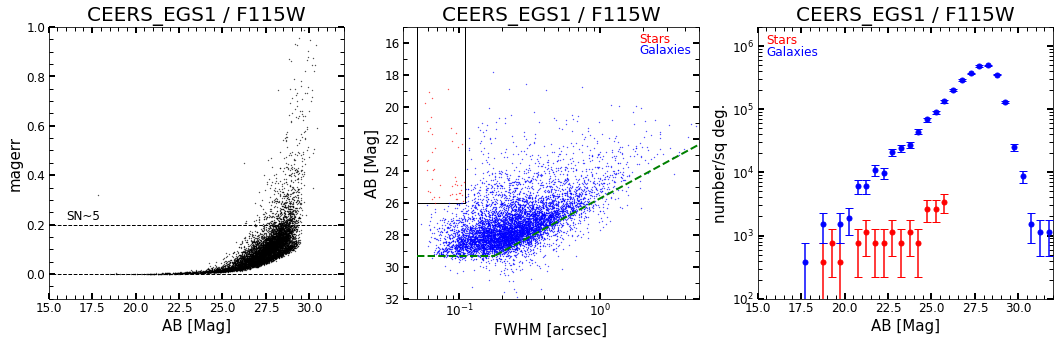

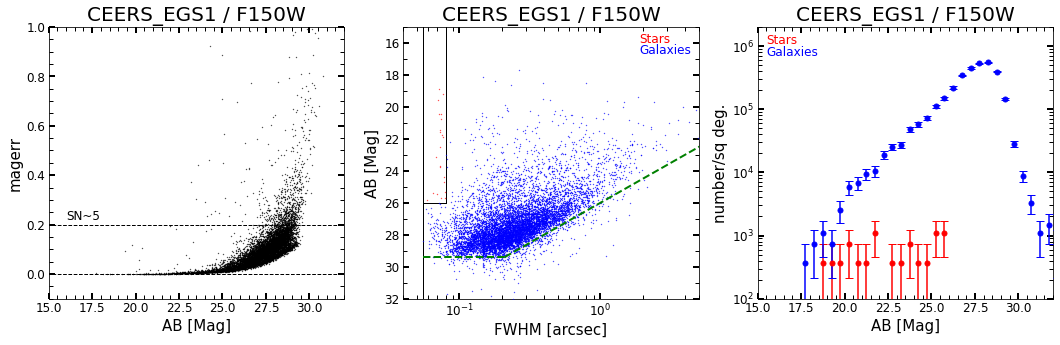

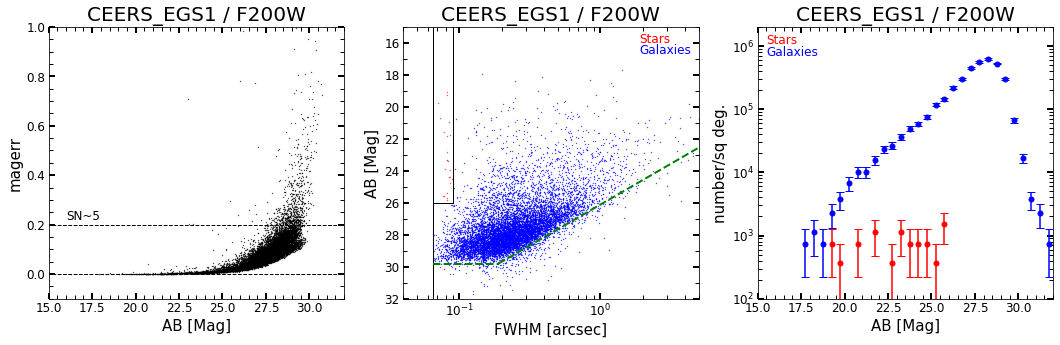

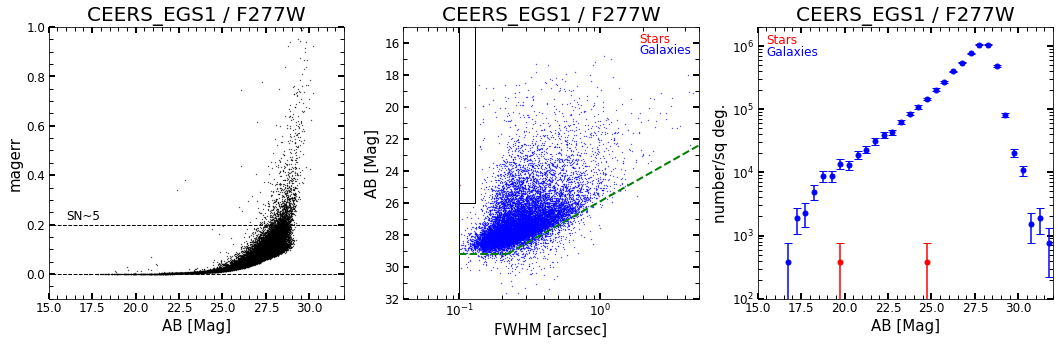

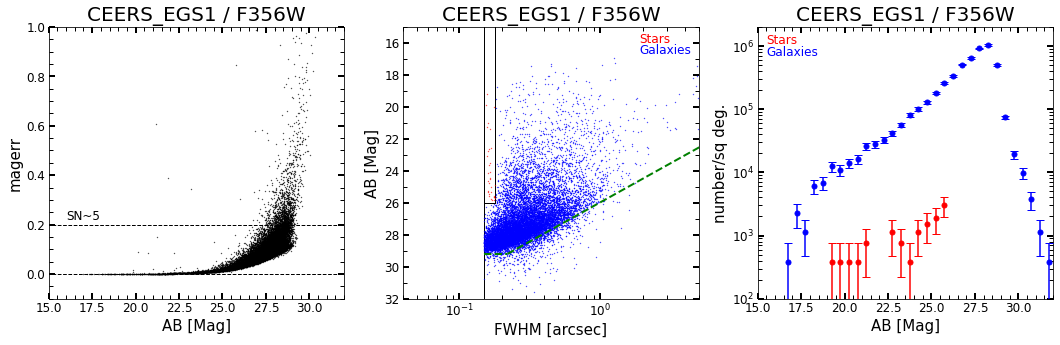

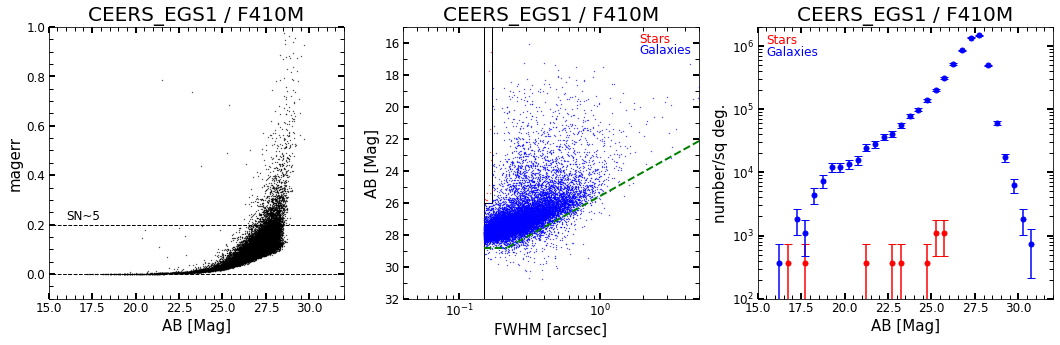

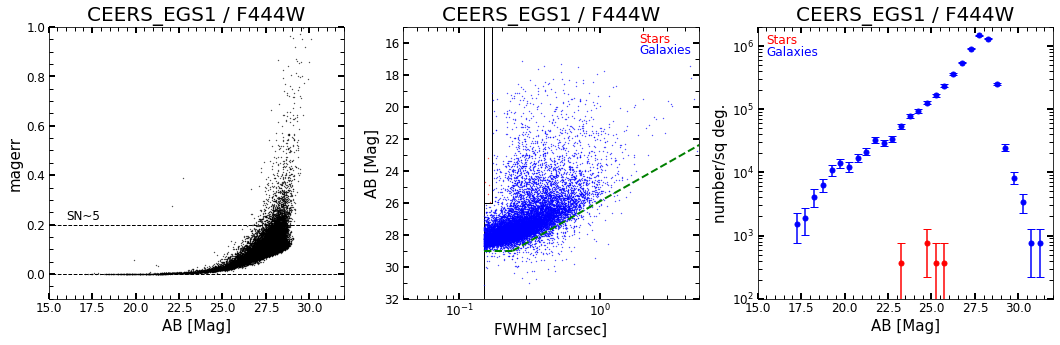

In [6]:
sorteazy.set_sb('F115W', 29.3, 0.18, -4.8)
sorteazy.set_sb('F150W', 29.4, 0.21, -5)
sorteazy.set_sb('F200W', 29.8, 0.19, -5.1)
sorteazy.set_sb('F277W', 29.2, 0.22, -5)
sorteazy.set_sb('F356W', 29.2, 0.22, -4.9)
sorteazy.set_sb('F410M', 28.8, 0.22, -4.9)
sorteazy.set_sb('F444W', 29, 0.24, -5)
sorteazy.run_plots()

# Match catalogs

In [7]:
m = MakeCats('CEERS_EGS1', cat_dir, 'CEERS_EGS1_*_cat.txt', 0.031)

Initialized. Found 7 catalogs.


In [8]:
m.match('F444W')

Filtering Non-Detections...: 100%|██████| 17379/17379 [00:16<00:00, 1049.13it/s]


SAVING /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/cats/CEERS_EGS1_total_cat.txt


# Run EAZY

In [9]:
eazy_path = '/Users/jakesummers7200/eazy/eazy-py/eazy-photoz/inputs' # change this

### EAZY PARAMETERS

params = {}
params['CATALOG_FILE'] = os.path.join(cat_dir, 'CEERS_EGS1_total_cat.txt')

params['Z_STEP'] = 0.1
params['Z_MIN'] = 0.01
params['Z_MAX'] = 11

params['MAGNITUDES'] = 'y'
params['OBS_SED_FILE'] = 'y'
params['TEMP_SED_FILE'] = 'y'
params['POFZ_FILE'] = 'y'
params['BINARY_OUTPUT'] = 'n'

params['PRIOR_ABZP'] = 25 
params['PRIOR_FILTER'] = 365 
params['PRIOR_FILE'] = 'templates/prior_F160W_TAO.dat'
params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'

translate_file = os.path.join(eazy_path, 'zphot.translate')

### RUN EAZY

if not os.path.exists(os.path.join(eazy_path, 'OUTPUT')):
    os.makedir(os.path.join(eazy_path, 'OUTPUT'))

e = Eazy(eazypath=eazy_path, params=params)
e.makeparam()

Parameters written to zphot.param at /Users/jakesummers7200/eazy/eazy-py/eazy-photoz/inputs/zphot.param


In [10]:
e.run()

Converting catalog MAGNITUDES to fluxes...
Generating template grid >>>>>>>>>>>>> Done.


# Make Trilogy Color Image

In [11]:
t = Trilogy(image_dir, imfile, 'CEERS_EGS1')

F115W /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images/CEERS_EGS1_f115w_sci.fits
F150W /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images/CEERS_EGS1_f150w_sci.fits
F200W /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images/CEERS_EGS1_f200w_sci.fits
F277W /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images/CEERS_EGS1_f277w_sci.fits
F356W /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images/CEERS_EGS1_f356w_sci.fits
F410M /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images/CEERS_EGS1_f410m_sci.fits
F444W /Users/jakesummers7200/JWST/Notebooks/sorteazy/CEERS_EGS1/images/CEERS_EGS1_f444w_sci.fits


In [12]:
t.bkgsub()

Subtracting backgrounds: 100%|████████████████████| 7/7 [00:45<00:00,  6.44s/it]


In [13]:
filter_colors = {}
# R, G, B (these are tuples but can be lists, arrays, etc.)
filter_colors['F090W'] = 0, 0, 1 
filter_colors['F115W'] = 0, 0, 1 
filter_colors['F150W'] = 0, 0, 1 
filter_colors['F200W'] = 0, 1, 0 
filter_colors['F277W'] = 0, 1, 0 
filter_colors['F356W'] = 1, 0, 0 
filter_colors['F410M'] = 1, 0, 0 
filter_colors['F444W'] = 1, 0, 0 

#t.auto_colors() # does it automatically without filter_colors
t.manual_colors(filter_colors) # does it manually using the above dictionary

Combining colors: 100%|███████████████████████████| 7/7 [00:00<00:00, 19.50it/s]


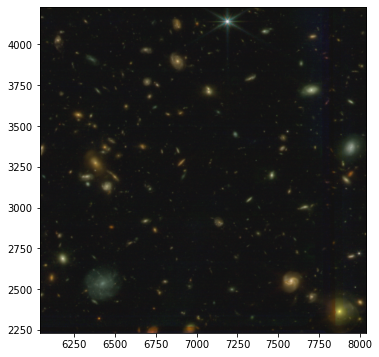

In [14]:
t.make_stamp(dx=2000, dy=1000, sample_size=2000, noiselum=0.1, satpercent=0.001)

In [15]:
t.make_RGB()

Combining colors: 100%|███████████████████████████| 7/7 [00:03<00:00,  1.89it/s]


Done making full RGB image.


In [16]:
imrgb = t.enhance(color=2, contrast=1.4)

# Make EAZY Plots

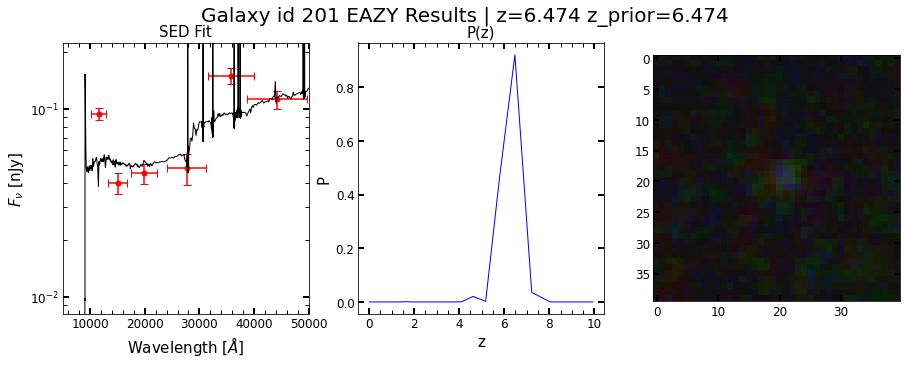

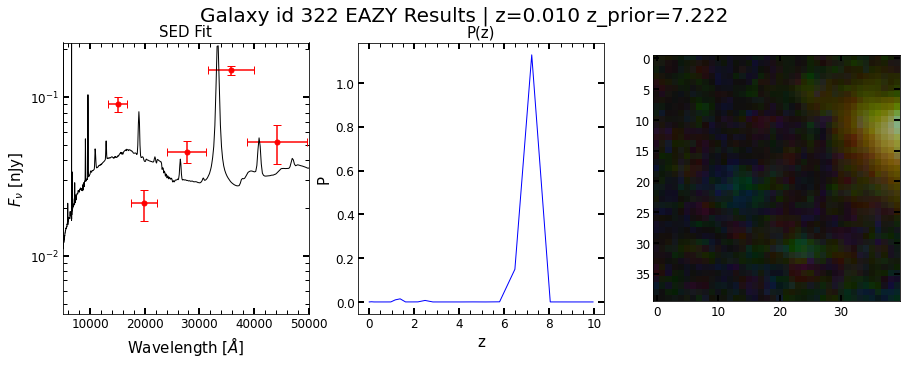

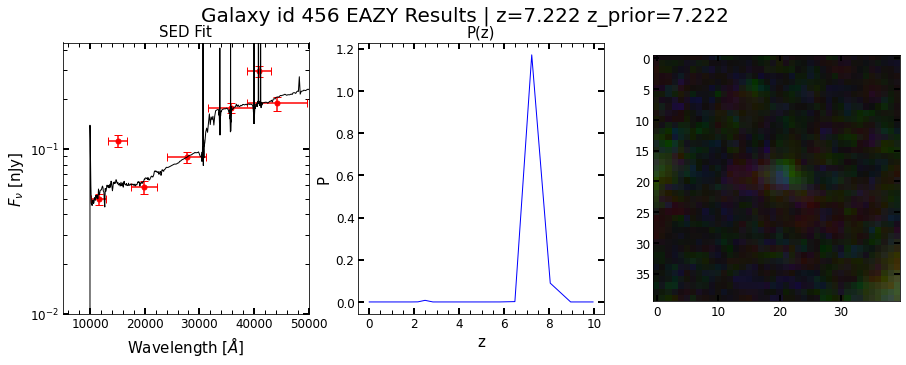

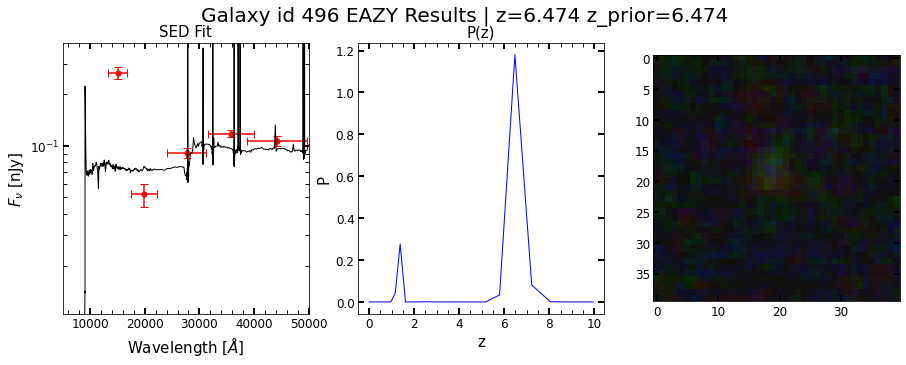

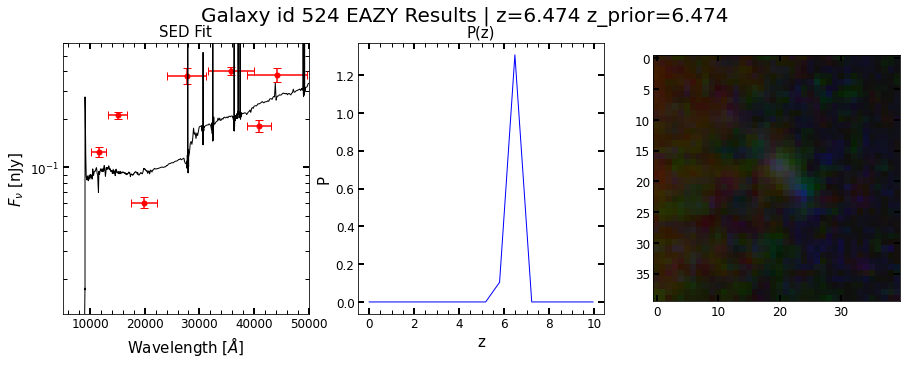

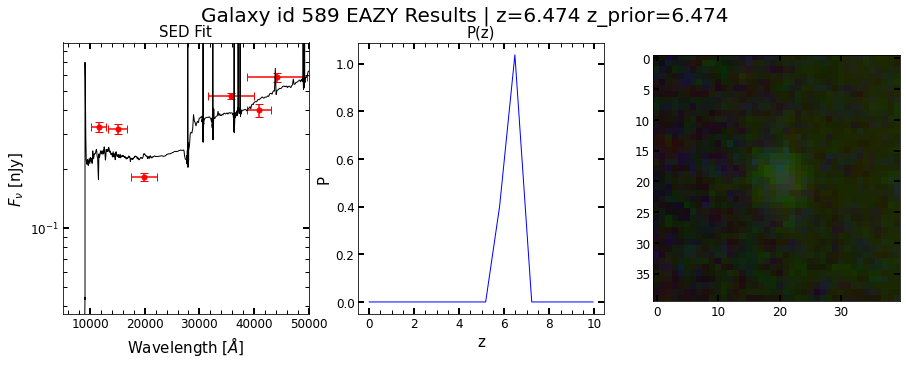

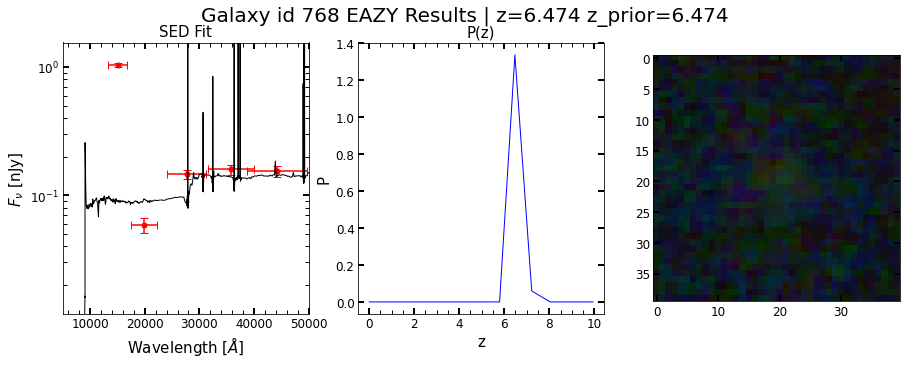

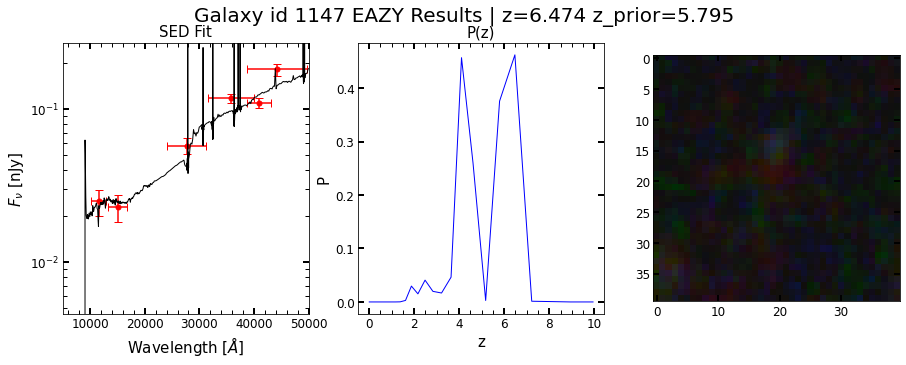

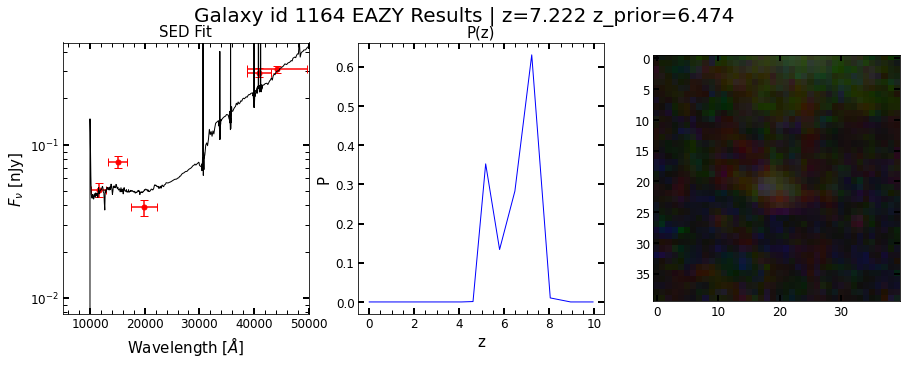

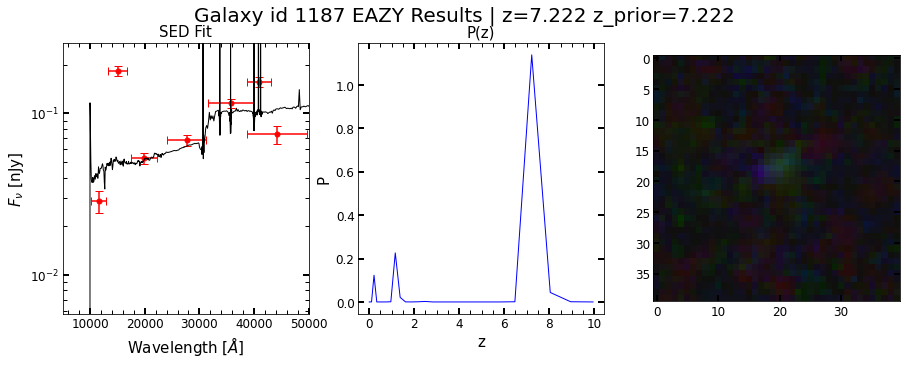

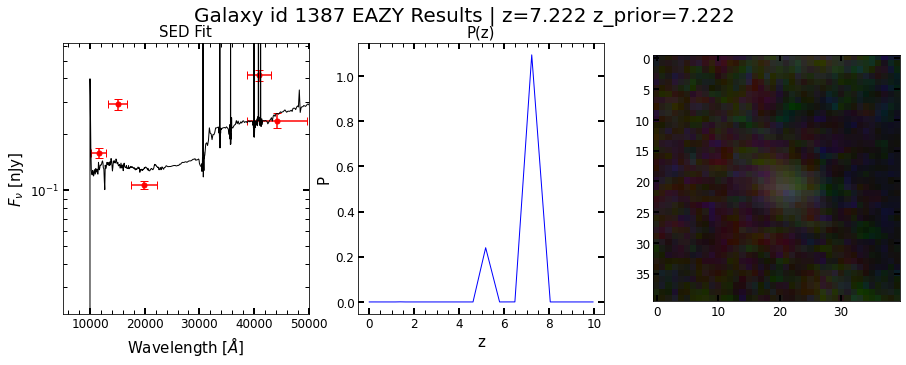

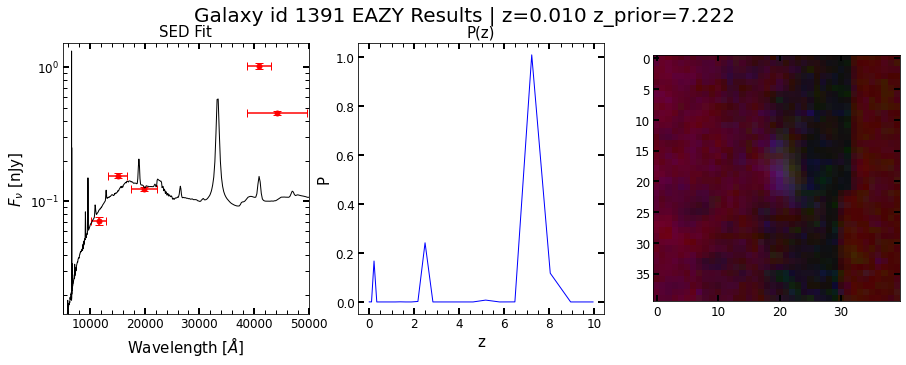

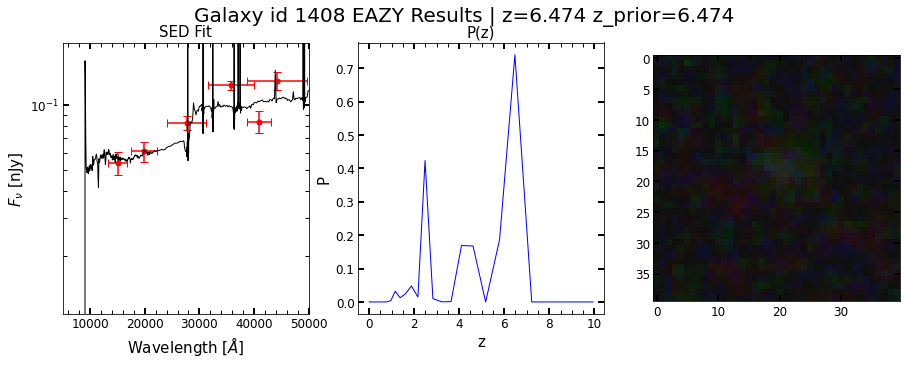

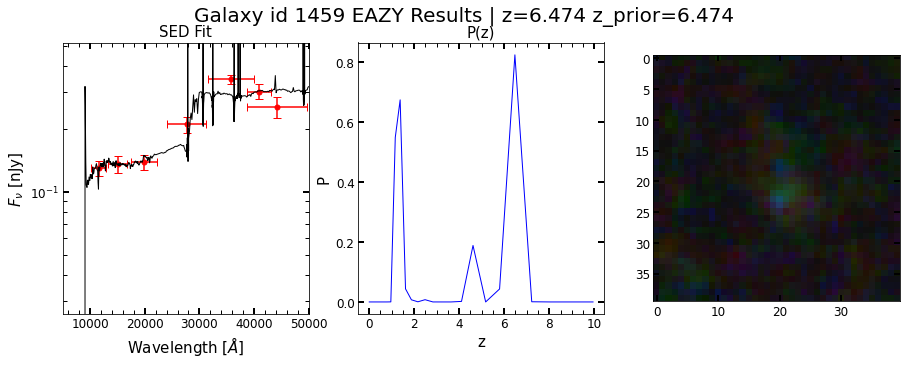

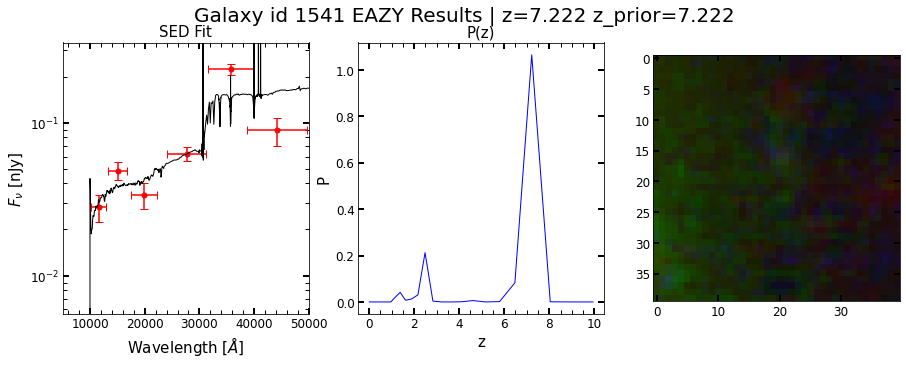

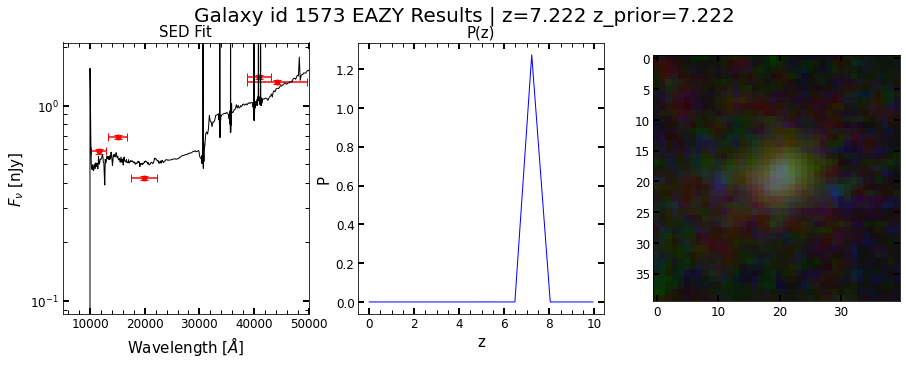

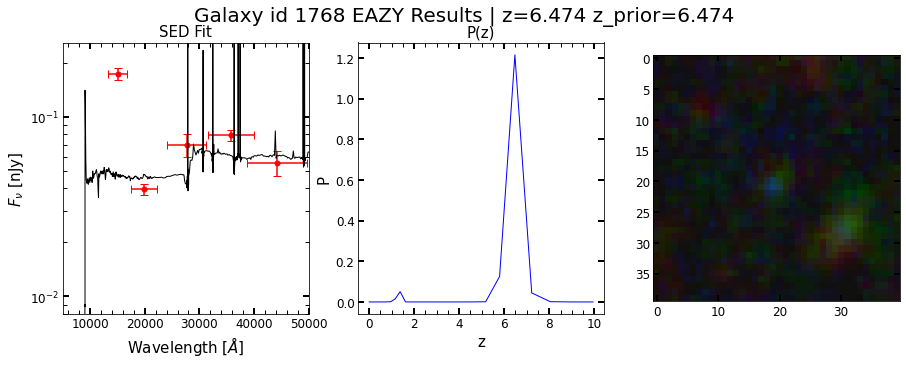

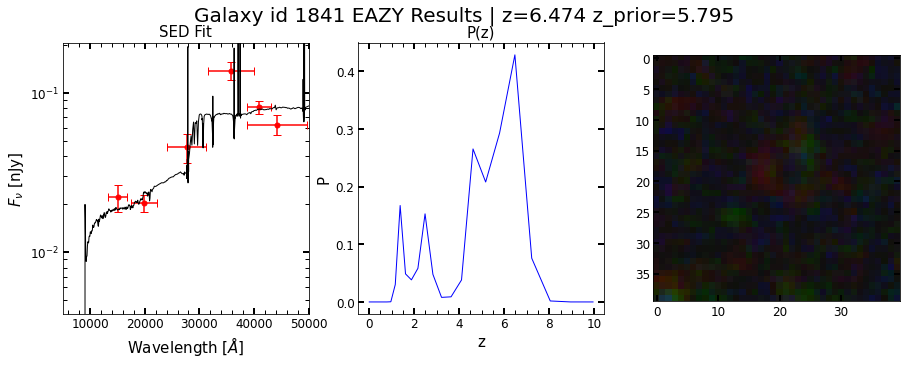

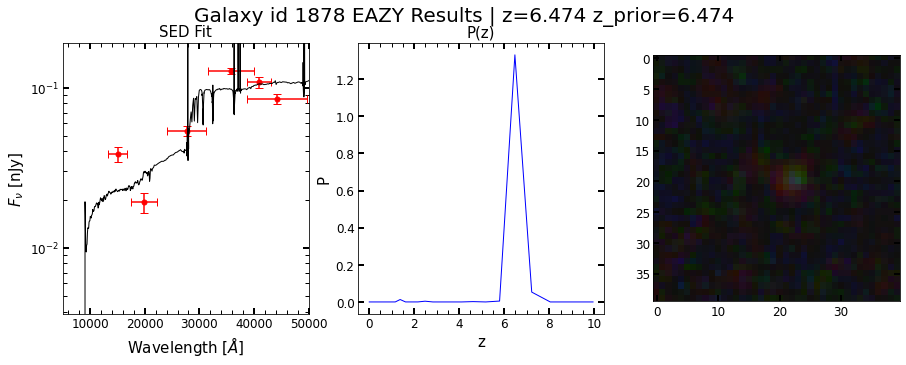

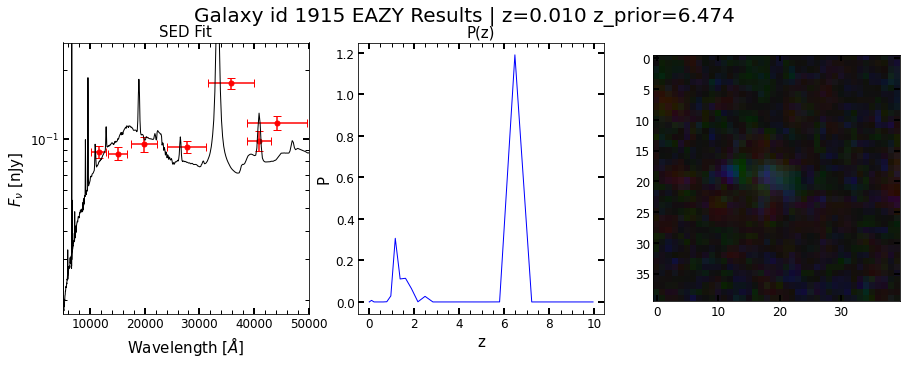

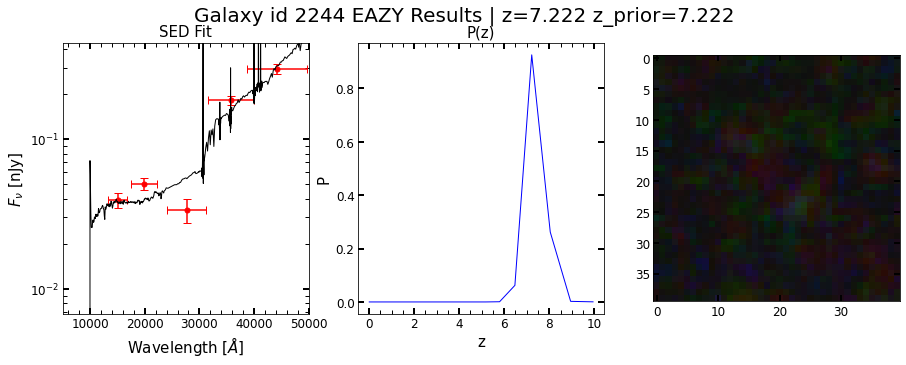

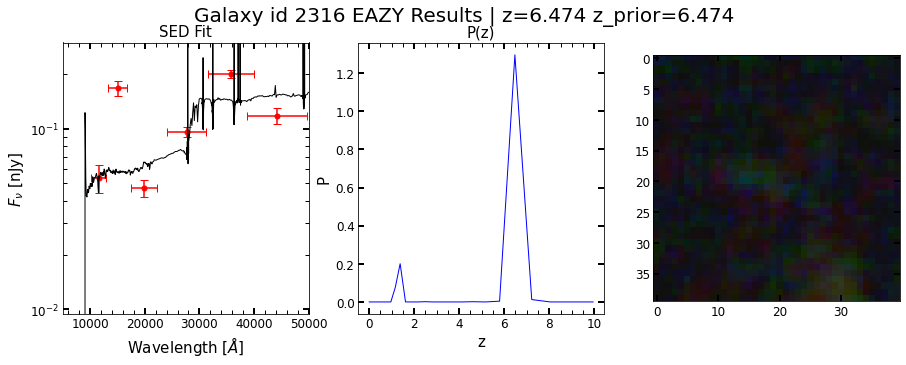

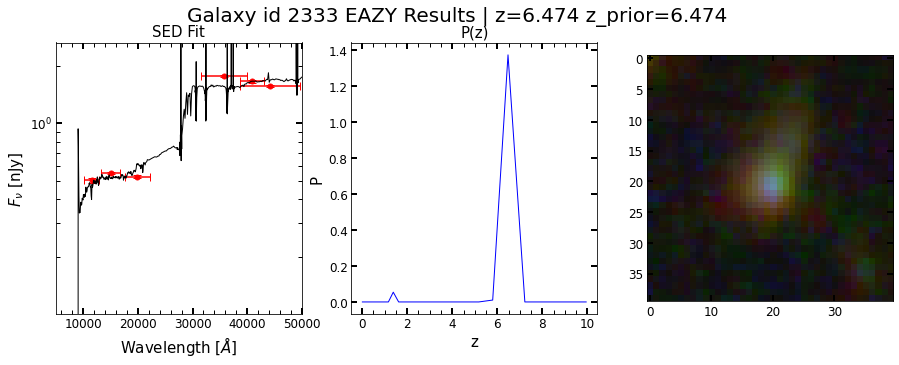

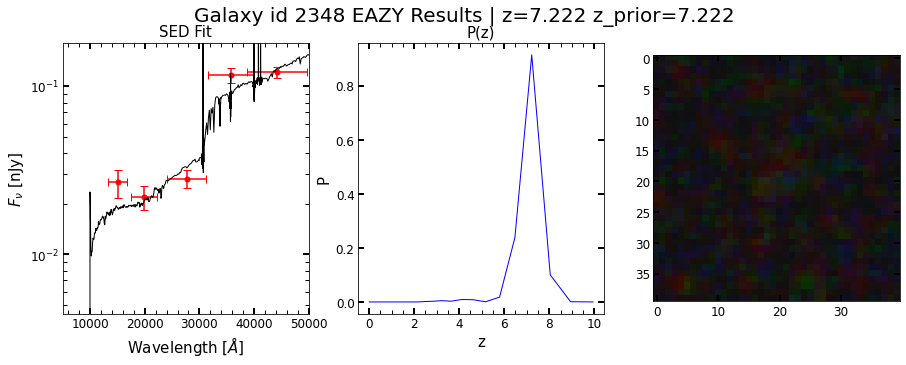

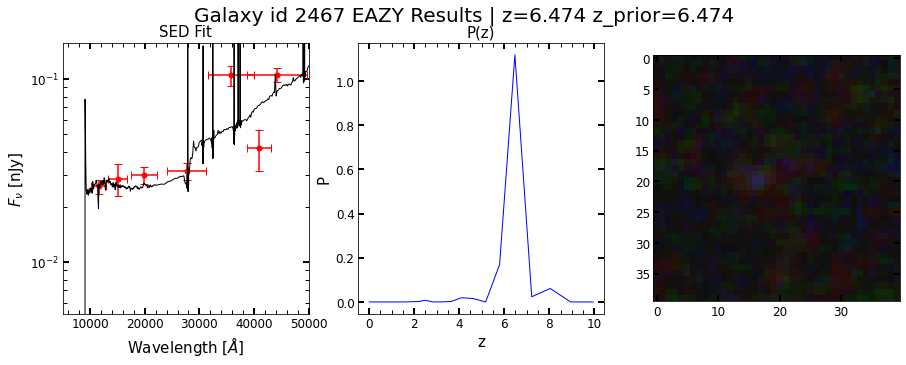

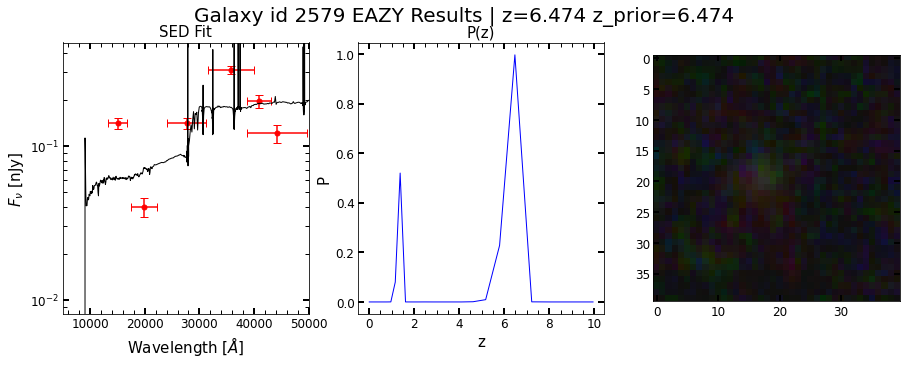

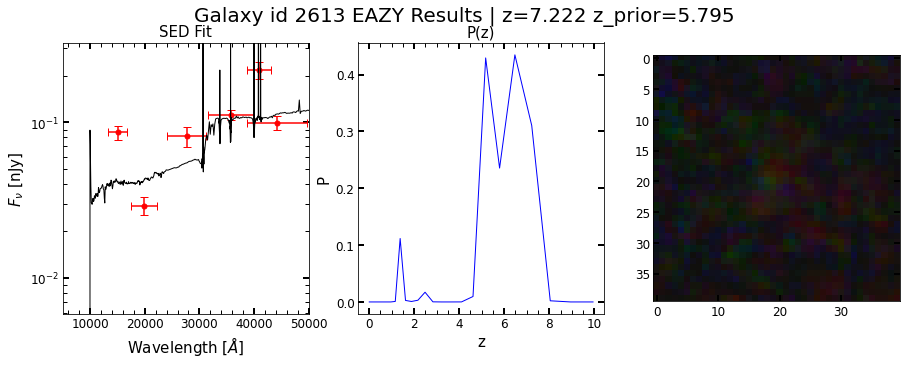

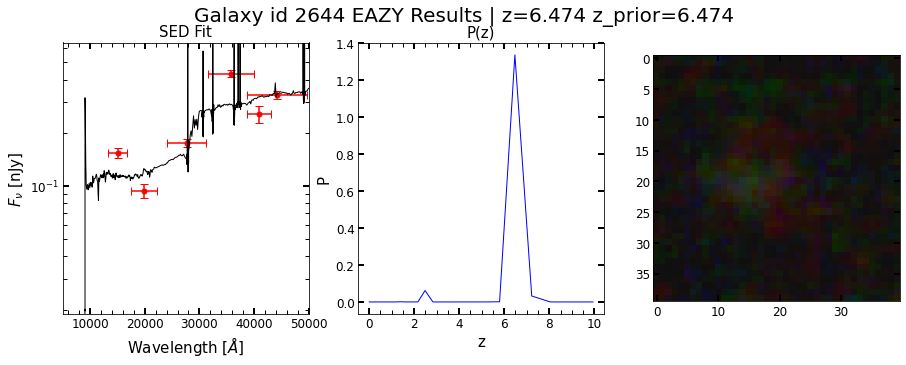

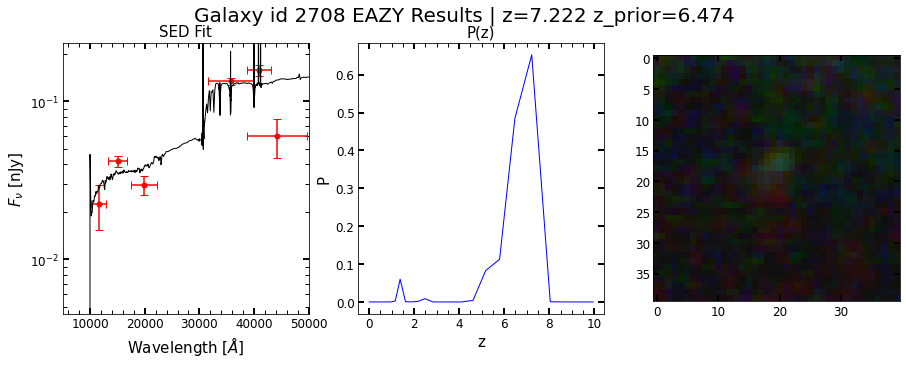

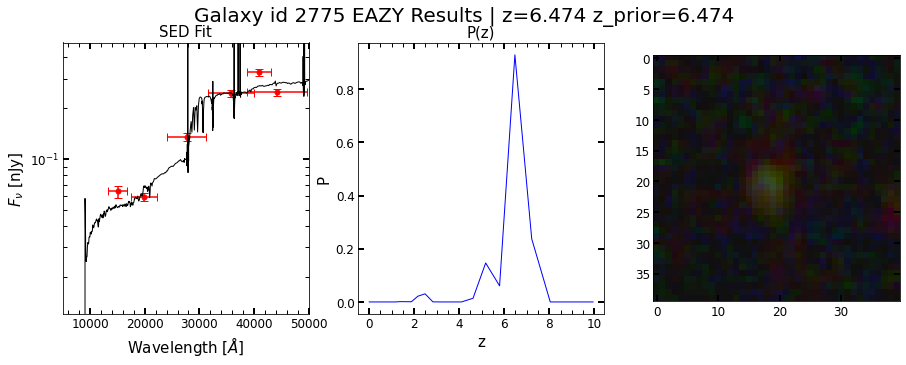

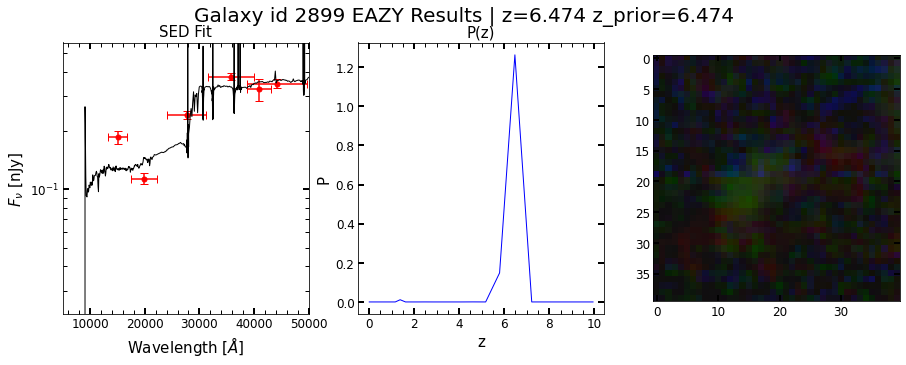

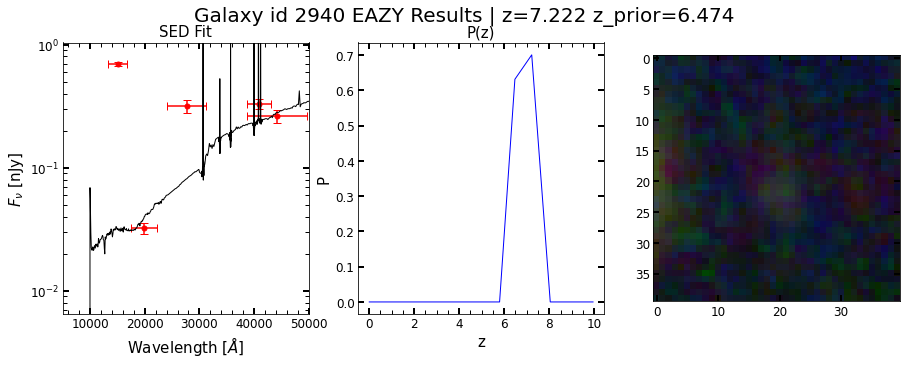

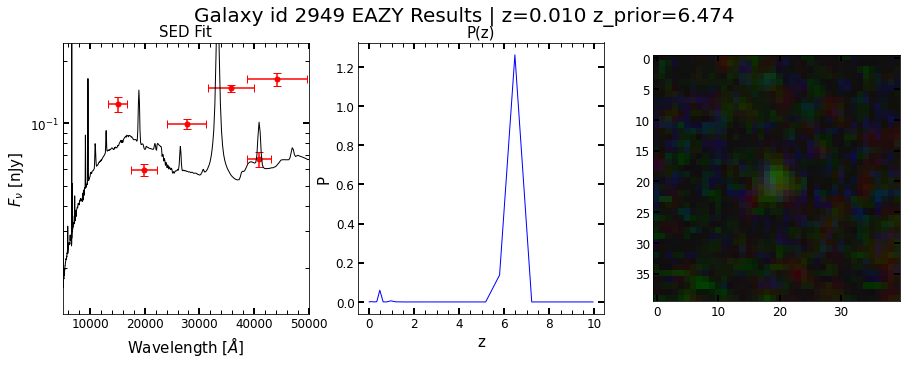

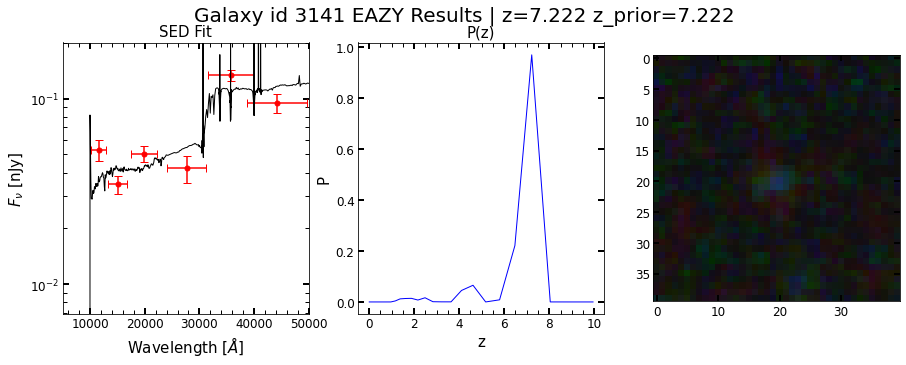

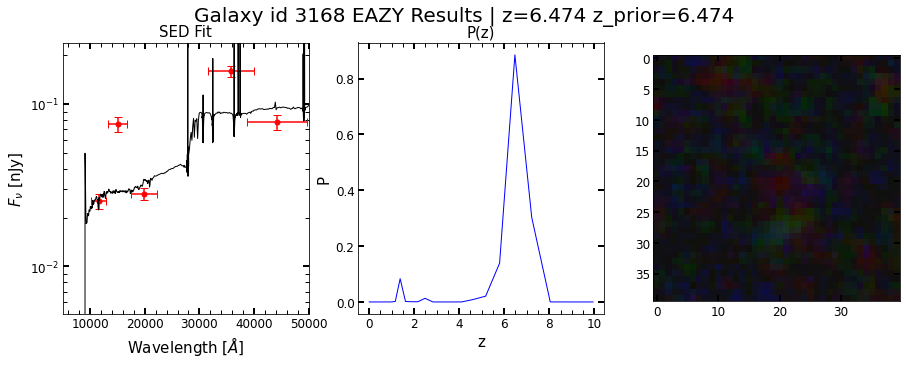

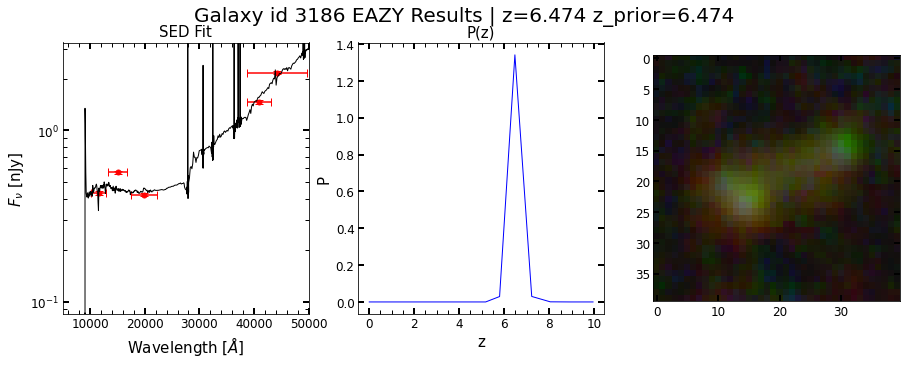

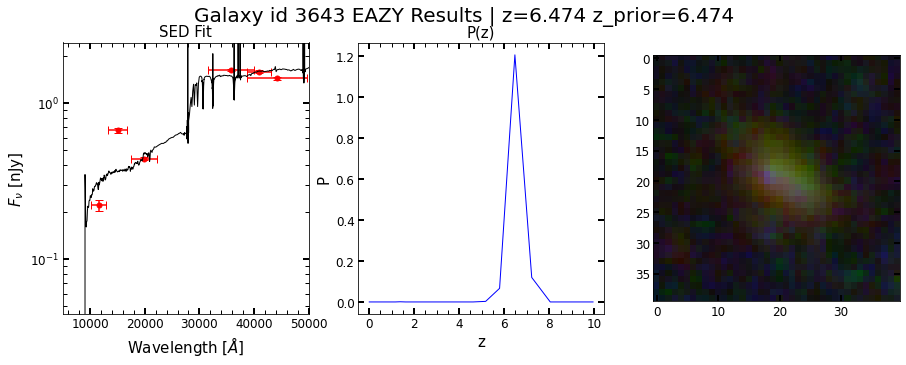

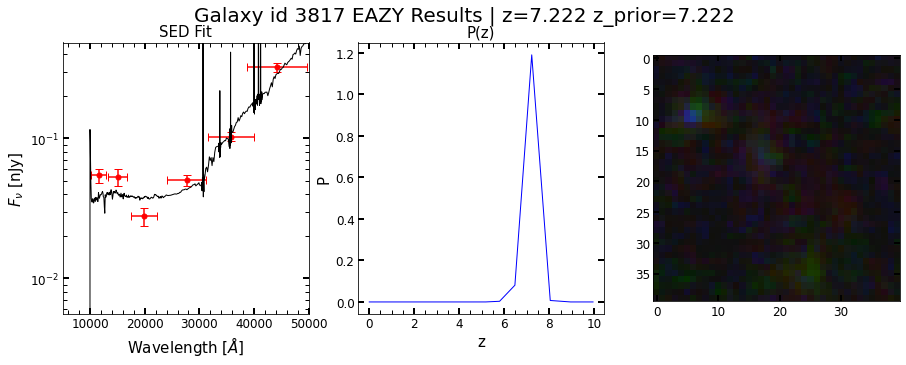

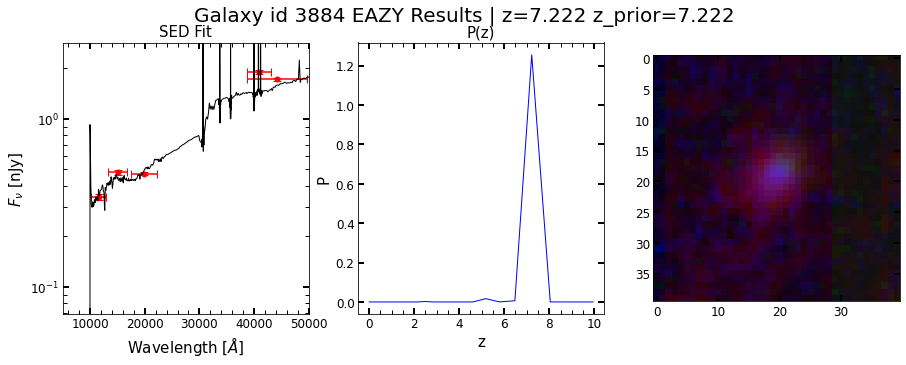

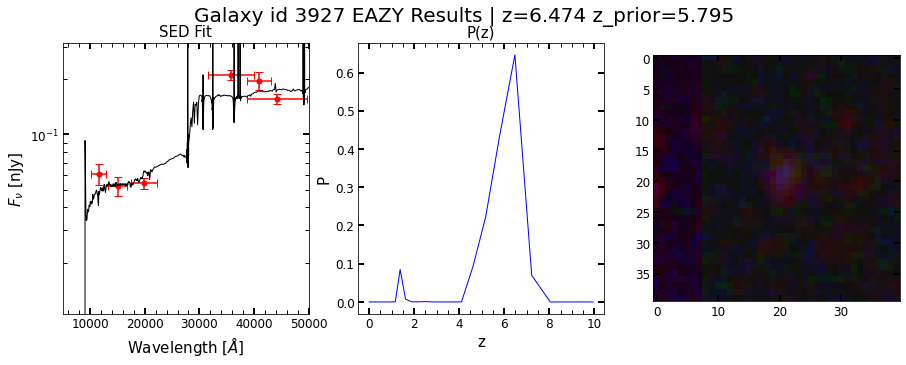

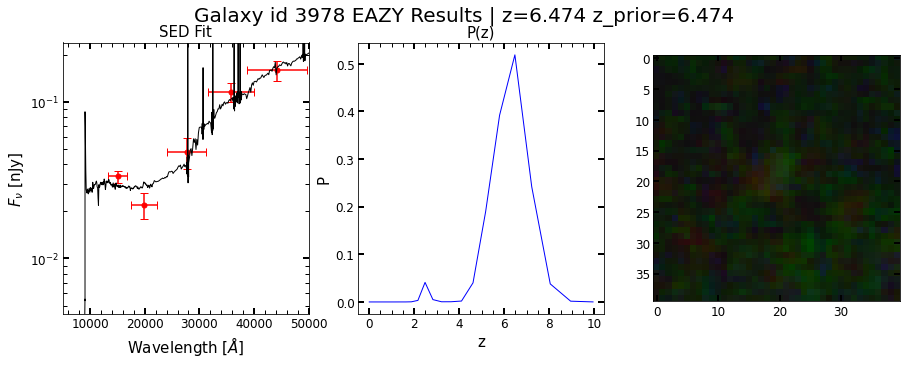

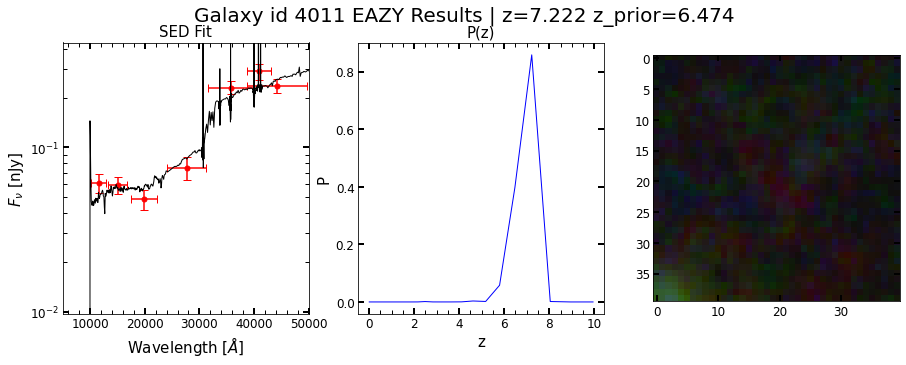

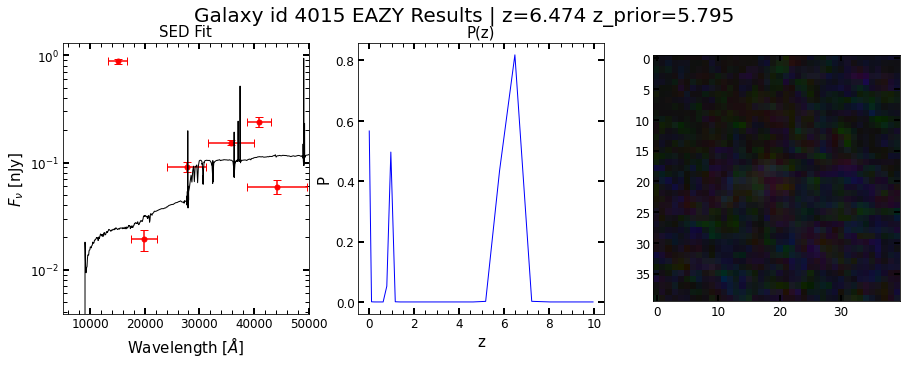

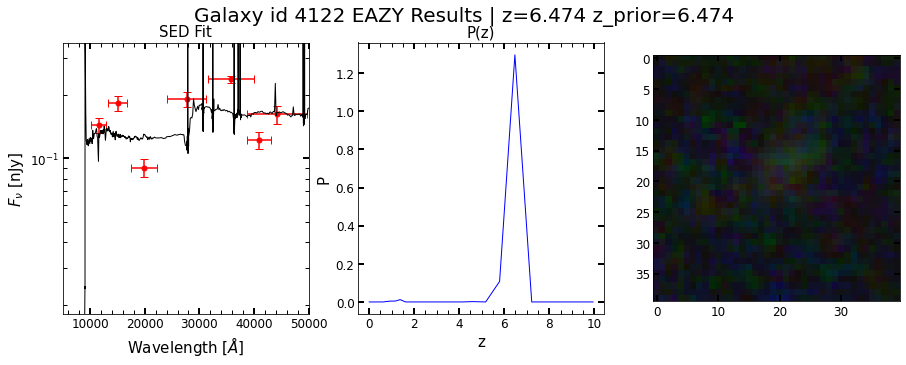

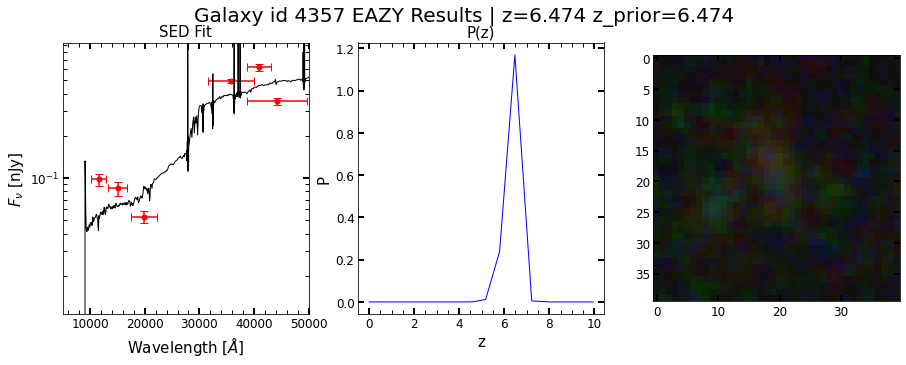

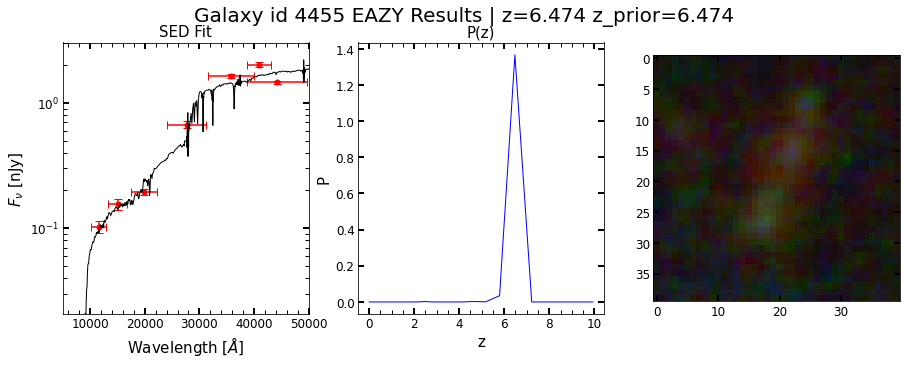

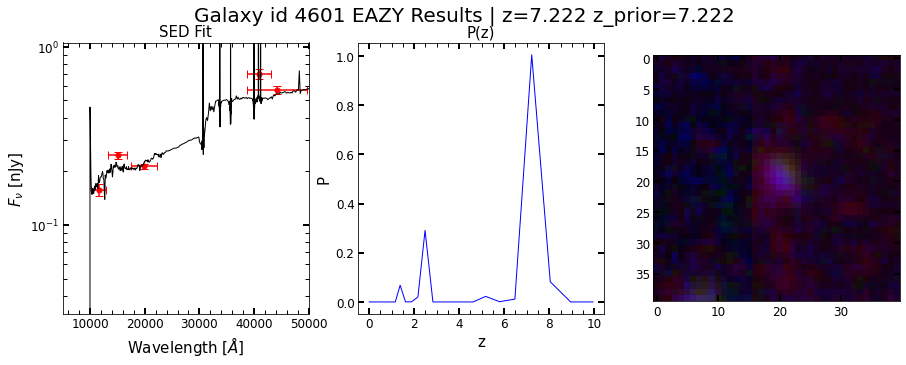

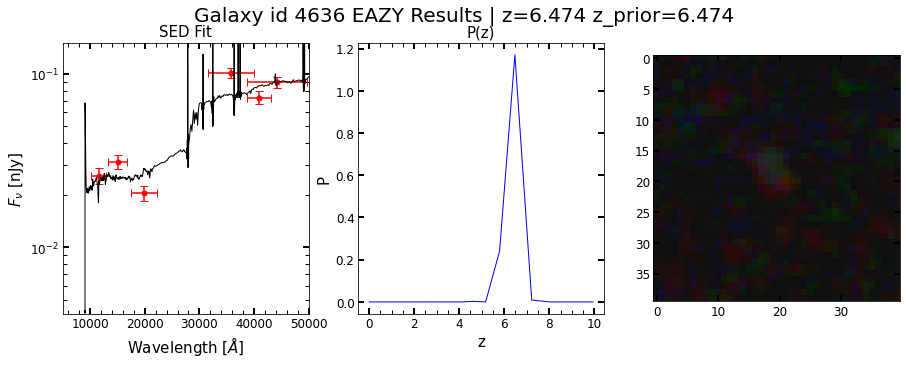

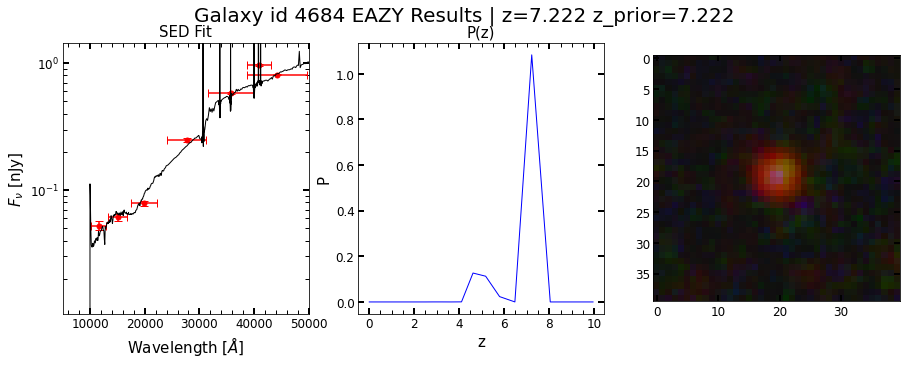

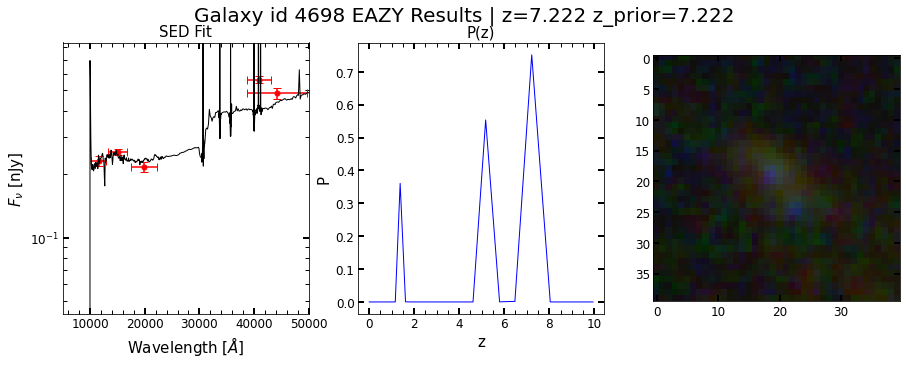

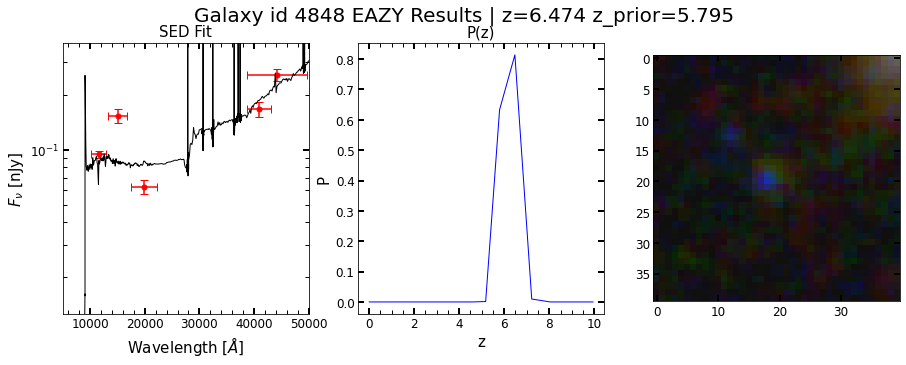

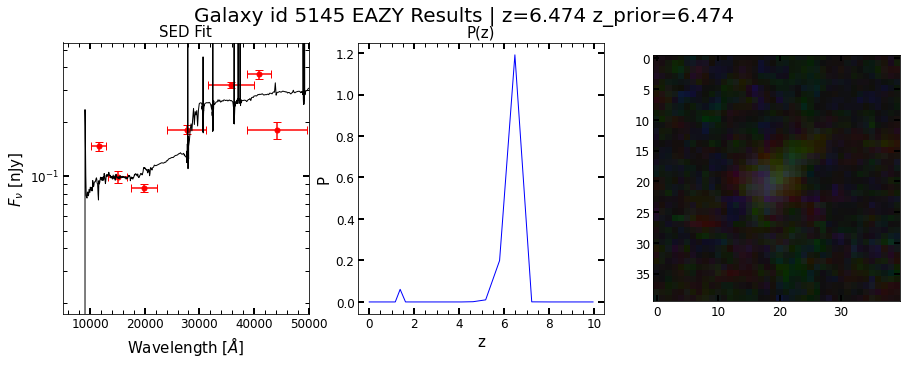

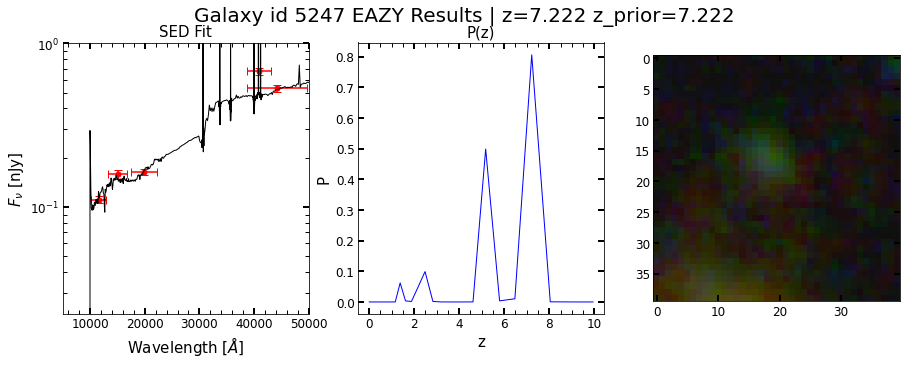

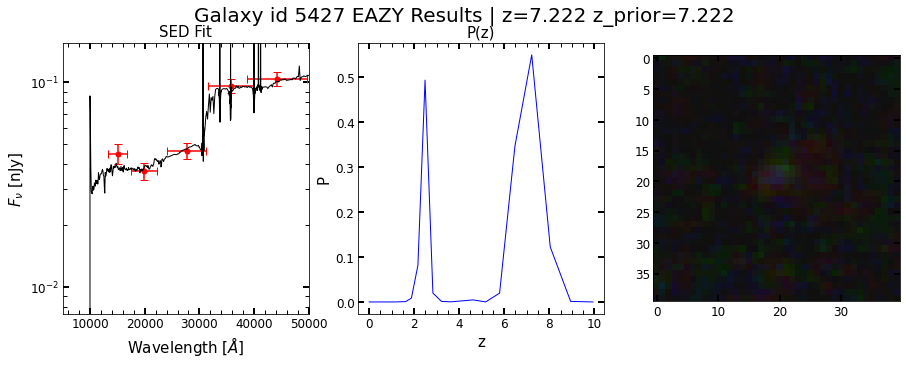

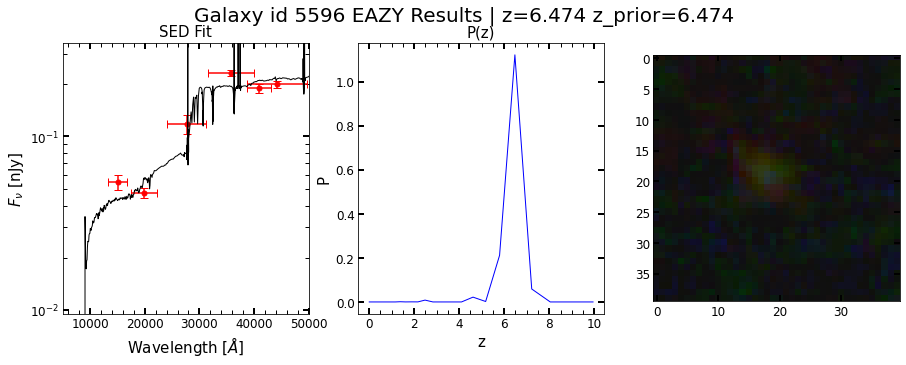

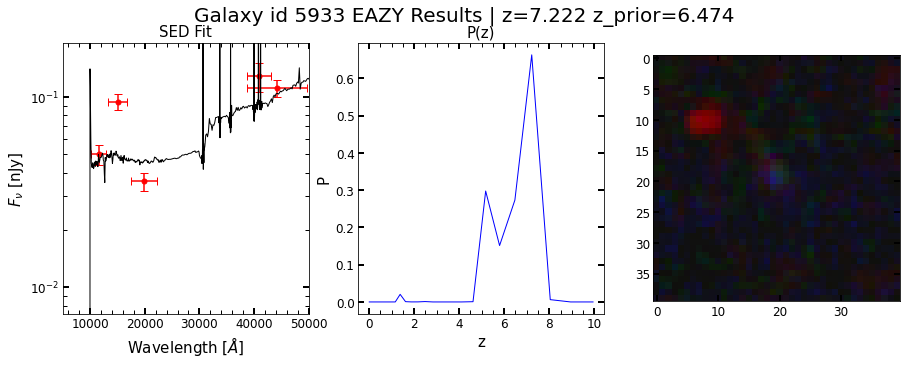

In [17]:
e.makePlots(eazy_path+'/OUTPUT', imrgb, zmin=6, zmax=8)